<a href="https://colab.research.google.com/github/Aikha-Zaki/stroke-prediction/blob/main/STROKE_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BRAIN STROKE PREDICTION**


Stroke is a medical disorder that happens due to arteries rupture or blockage in the brain causing damage to the brain. It can cause serious long-term disability and in the worst cases, it might lead to death. The probable risk factors for stroke include hypertension, diabetes, smoking, age, sex, obesity, environment, and others. 
The objective of this project is to find the likeliness of a stroke happening in a person. Ideally, this project might provide initial insight into the early detection of stroke and obtain early treatment. Different machine learning models have been used to predict the possibility of a stroke to occur.  The algorithm used in this project are logistic regression, KNN, and decision tree to train three different models for reliable prediction. This dataset is obtained from Kaggle

In [ ]:
# Import data
Table = read.csv("/content/full_data.csv")
# Creating backup of data
df=Table



In [ ]:
library(tidyverse)
library(dplyr)
library(ggplot2)



install.packages("caTools")
install.packages("ROCR")
install.packages("ggpubr")
library(caTools)
library(ROCR)
library(ggpubr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# **UNDERSTAND DATA**

In [ ]:
# Data viewing
head(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [ ]:
# Understand your data's structure
# Check class of data
class(df)

# Check number of rows . columns
dim(df)

# Check data types/structure
str(df)

# Summary
summary(df)

[1] "data.frame"

[1] 4981   11

'data.frame':	4981 obs. of  11 variables:
 $ gender           : chr  "Male" "Male" "Female" "Female" ...
 $ age              : num  67 80 49 79 81 74 69 78 81 61 ...
 $ hypertension     : int  0 0 0 1 0 1 0 0 1 0 ...
 $ heart_disease    : int  1 1 0 0 0 1 0 0 0 1 ...
 $ ever_married     : chr  "Yes" "Yes" "Yes" "Yes" ...
 $ work_type        : chr  "Private" "Private" "Private" "Self-employed" ...
 $ Residence_type   : chr  "Urban" "Rural" "Urban" "Rural" ...
 $ avg_glucose_level: num  229 106 171 174 186 ...
 $ bmi              : num  36.6 32.5 34.4 24 29 27.4 22.8 24.2 29.7 36.8 ...
 $ smoking_status   : chr  "formerly smoked" "never smoked" "smokes" "never smoked" ...
 $ stroke           : int  1 1 1 1 1 1 1 1 1 1 ...


    gender               age         hypertension     heart_disease    
 Length:4981        Min.   : 0.08   Min.   :0.00000   Min.   :0.00000  
 Class :character   1st Qu.:25.00   1st Qu.:0.00000   1st Qu.:0.00000  
 Mode  :character   Median :45.00   Median :0.00000   Median :0.00000  
                    Mean   :43.42   Mean   :0.09617   Mean   :0.05521  
                    3rd Qu.:61.00   3rd Qu.:0.00000   3rd Qu.:0.00000  
                    Max.   :82.00   Max.   :1.00000   Max.   :1.00000  
 ever_married        work_type         Residence_type     avg_glucose_level
 Length:4981        Length:4981        Length:4981        Min.   : 55.12   
 Class :character   Class :character   Class :character   1st Qu.: 77.23   
 Mode  :character   Mode  :character   Mode  :character   Median : 91.85   
                                                          Mean   :105.94   
                                                          3rd Qu.:113.86   
                                        

In [ ]:
# Arrange table on descending order based on stroke
df %>% arrange(desc(stroke))

gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>
Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1


In [ ]:
# Data Cleaning
# Analyze missing data from dataset
any(is.na(df)) # Check NA in entire df
sum(is.na(df)) # Count NA 
colSums(is.na(df)) # Summary of df with relation to NA 

[1] FALSE

[1] 0

gender               age      hypertension     heart_disease 
                0                 0                 0                 0 
     ever_married         work_type    Residence_type avg_glucose_level 
                0                 0                 0                 0 
              bmi    smoking_status            stroke 
                0                 0                 0

It shown above, there is no missing data from the dataset.

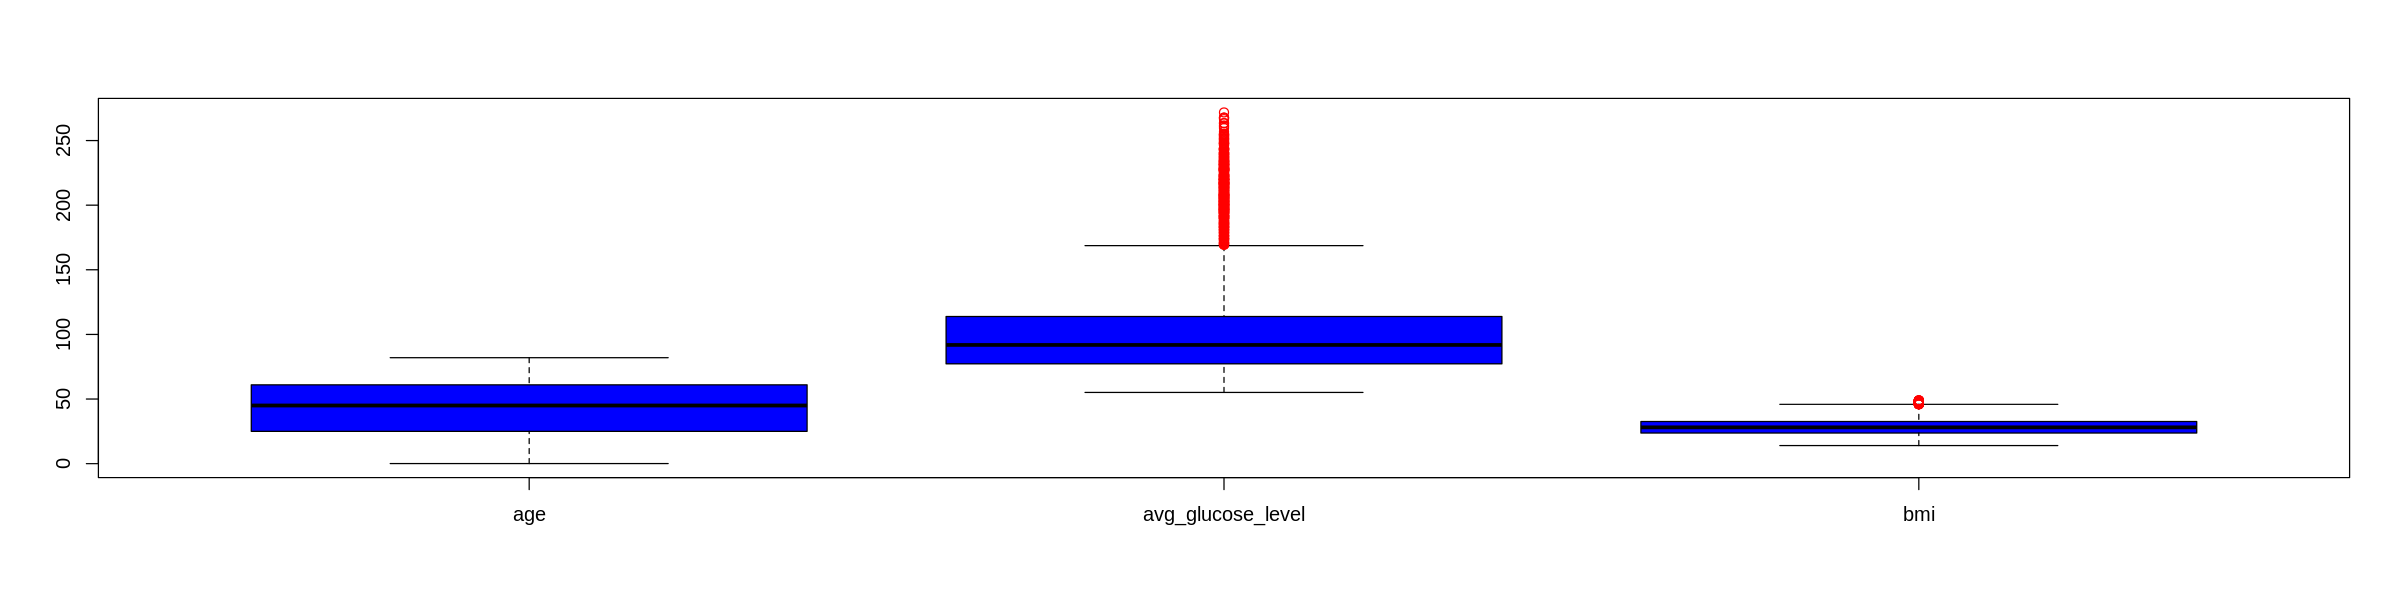

In [ ]:
# Check outliers
# Outliers in the data values exists only in continuous/numeric form of data variables. 
num_var = c('age','avg_glucose_level','bmi') #or num_var =subset(data, select = -c(cat_var))

# Using boxplot to detect outliers
boxplot(df[ , num_var], col = "blue", outcol ="red")



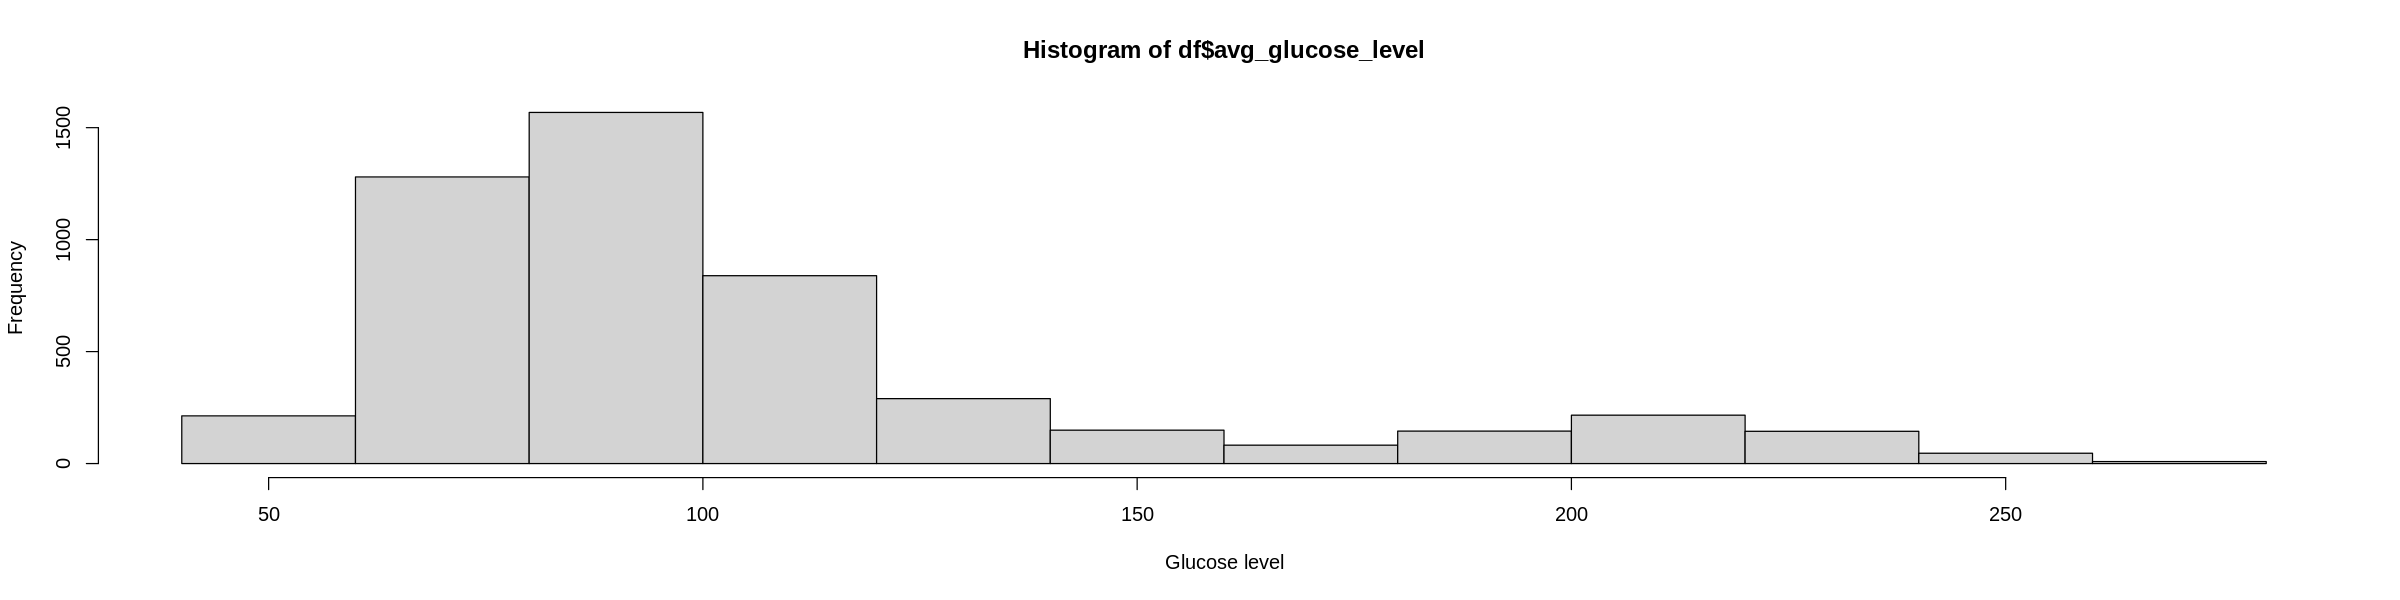

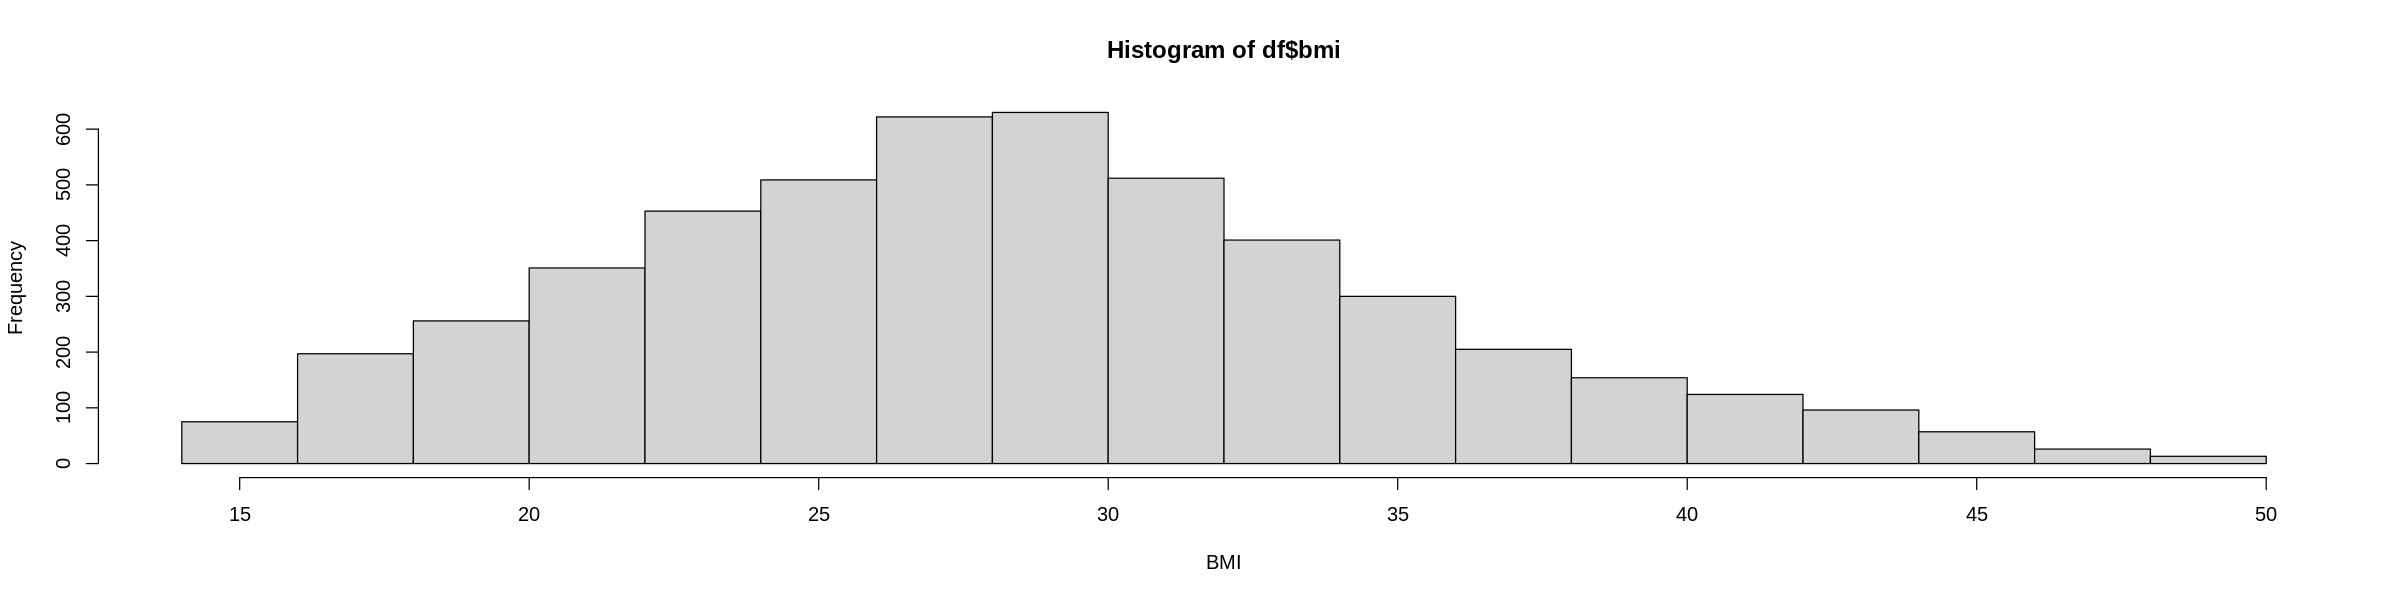

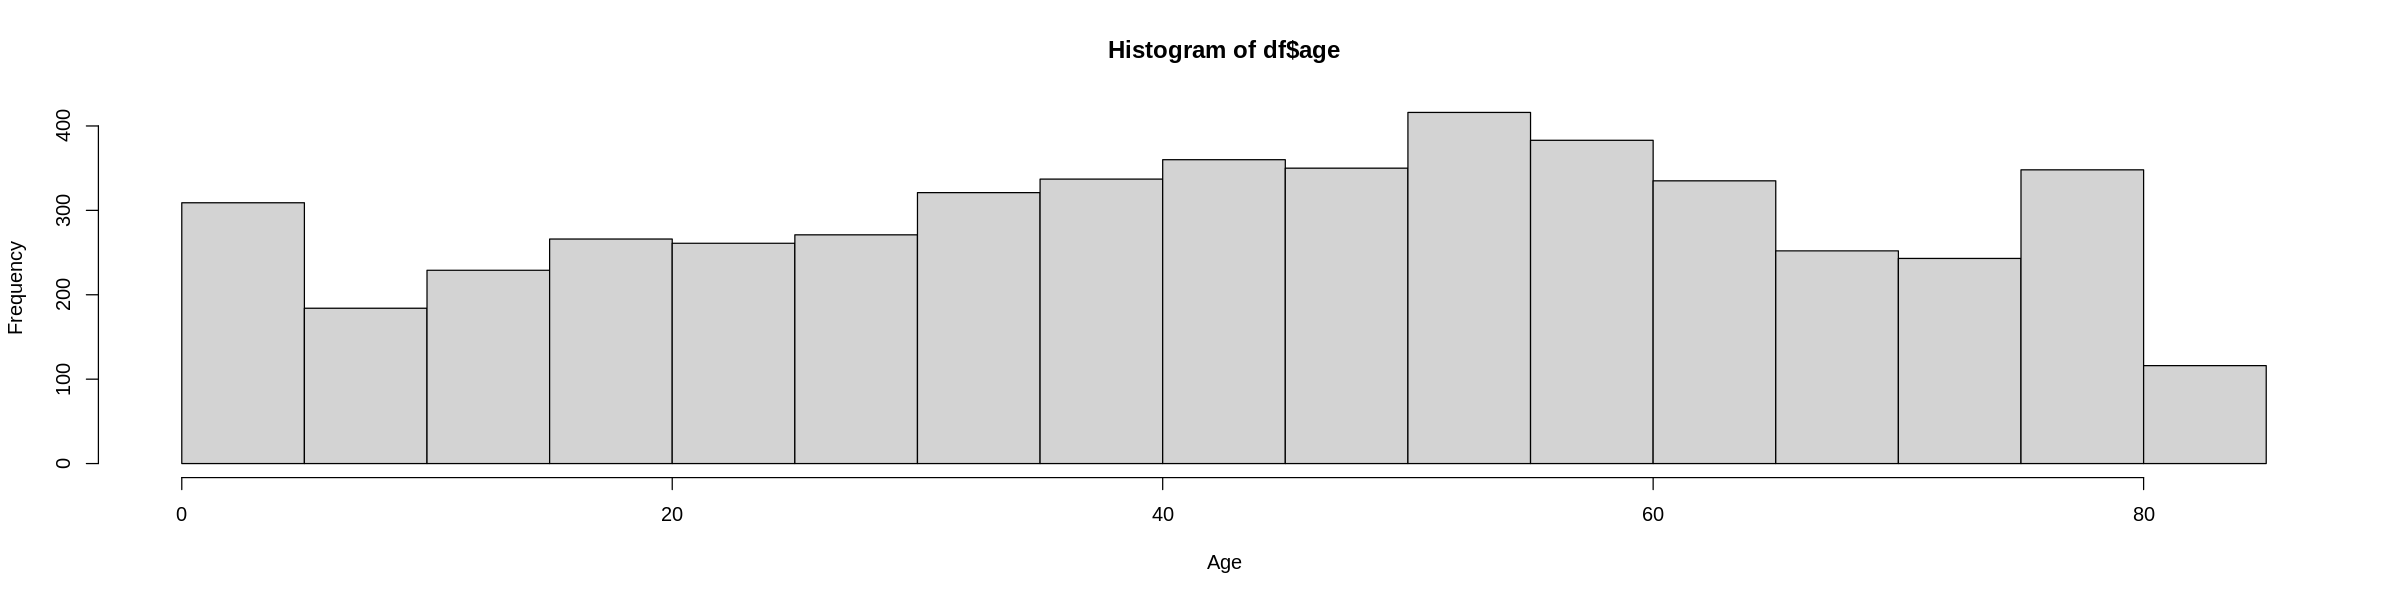

In [ ]:
# skewness of data
hist(df$avg_glucose_level, xlab = 'Glucose level') 
hist(df$bmi, xlab='BMI') 
hist(df$age, xlab='Age')

From the boxplot analysis, outliers are detected in data variables of avg_glucose_level and bmi.

From histogram, we can see the avg_glucose_level and age are skewed.

However,  these outliers represent natural variations and should be left in the dataset.

In [ ]:
# Examine non-numeric column
as.data.frame(table(df$gender))
as.data.frame(table(df$ever_married))
as.data.frame(table(df$work_type))
as.data.frame(table(df$Residence_type))
as.data.frame(table(df$smoking_status))

Var1,Freq
<fct>,<int>
Female,2907
Male,2074


Var1,Freq
<fct>,<int>
No,1701
Yes,3280


Var1,Freq
<fct>,<int>
children,673
Govt_job,644
Private,2860
Self-employed,804


Var1,Freq
<fct>,<int>
Rural,2449
Urban,2532


Var1,Freq
<fct>,<int>
formerly smoked,867
never smoked,1838
smokes,776
Unknown,1500


In [ ]:
# The unknown value is high. So, it is not feasible to remove. Replace the unknown with the most frequent category
df_new = df %>% mutate(smoking_status = replace(smoking_status, smoking_status == "Unknown", "never smoked"))

# Check smoking_status
as.data.frame(table(df_new$smoking_status))

Var1,Freq
<fct>,<int>
formerly smoked,867
never smoked,3338
smokes,776


In [ ]:
#Summarized smoking status grouped according to stroke column
df_new %>% group_by(stroke, smoking_status) %>% summarise(N=n())

`summarise()` has grouped output by 'stroke'. You can override using the
`.groups` argument.


stroke,smoking_status,N
<int>,<chr>,<int>
0,formerly smoked,797
0,never smoked,3202
0,smokes,734
1,formerly smoked,70
1,never smoked,136
1,smokes,42


In [ ]:
# Convert categorical variables to factor for Data Analysis
df_plot = df_new

as.factor(df_plot$stroke) -> df_plot$stroke
as.factor(df_plot$gender) -> df_plot$gender
as.factor(df_plot$hypertension) -> df_plot$hypertension
as.factor(df_plot$heart_disease) -> df_plot$heart_disease
as.factor(df_plot$ever_married) -> df_plot$ever_married
as.factor(df_plot$work_type) -> df_plot$work_type
as.factor(df_plot$Residence_type) -> df_plot$Residence_type
as.factor(df_plot$smoking_status) -> df_plot$smoking_status

# **EXPLORATORY DATA ANALYSIS**

# **CATEGORICAL DATA**

In [ ]:
# get the count of each category
table(df_new$gender)
table(df_new$ever_married)
table(df_new$work_type)
table(df_new$Residence_type)
table(df_new$smoking_status)
table(df_new$hypertension)
table(df_new$heart_disease)


Female   Male 
  2907   2074 


  No  Yes 
1701 3280 


     children      Govt_job       Private Self-employed 
          673           644          2860           804 


Rural Urban 
 2449  2532 


formerly smoked    never smoked          smokes 
            867            3338             776 


   0    1 
4502  479 


   0    1 
4706  275 

In [ ]:
gender_counts <- df %>% 
  group_by(gender) %>% 
    summarize(counts = n())

marital_counts <- df %>% 
  group_by(ever_married) %>% 
    summarize(counts = n())

work_counts <- df %>% 
  group_by(work_type) %>% 
    summarize(counts = n())

res_counts <- df %>% 
  group_by(Residence_type) %>% 
    summarize(counts = n())

smoke_counts <- df_new %>% 
  group_by(smoking_status) %>% 
    summarize(counts = n())

hyp_counts <- df %>% 
  group_by(hypertension) %>% 
    summarize(counts = n())

hd_counts <- df %>% 
  group_by(heart_disease) %>% 
  summarize(counts = n())


In [ ]:
p_gender <- ggplot(gender_counts, aes(x = '', y =counts, fill = gender)) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Gender: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Blues")

p_marital <- ggplot(marital_counts, aes(x = '', y =counts, fill = ever_married)) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Marital status: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Reds")

p_work <- ggplot(work_counts, aes(x = '', y =counts, fill = work_type)) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Type of work: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Greens")

p_res <- ggplot(res_counts, aes(x = '', y =counts, fill = Residence_type)) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Type of residency: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Oranges")

p_smoke <- ggplot(smoke_counts, aes(x = '', y =counts, fill = smoking_status)) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Smoking Status: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Purples")

p_hyp <- ggplot(hyp_counts, aes(x = '', y =counts, fill = as.character(hypertension))) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Hypertension Presence: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = 6)

p_hd <- ggplot(hd_counts, aes(x = '', y =counts, fill = as.character(heart_disease))) +
  geom_bar(stat = 'identity', width = 1) +
  theme_classic() +
  ggtitle("Heart Disease Presence: Category Distribution") + 
  coord_polar("y", start = 0) +
  geom_text(aes(label = paste0("n: ", counts)), position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, y = NULL, fill = NULL) +
  theme(axis.line = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()) +
  scale_fill_brewer(palette = 15)


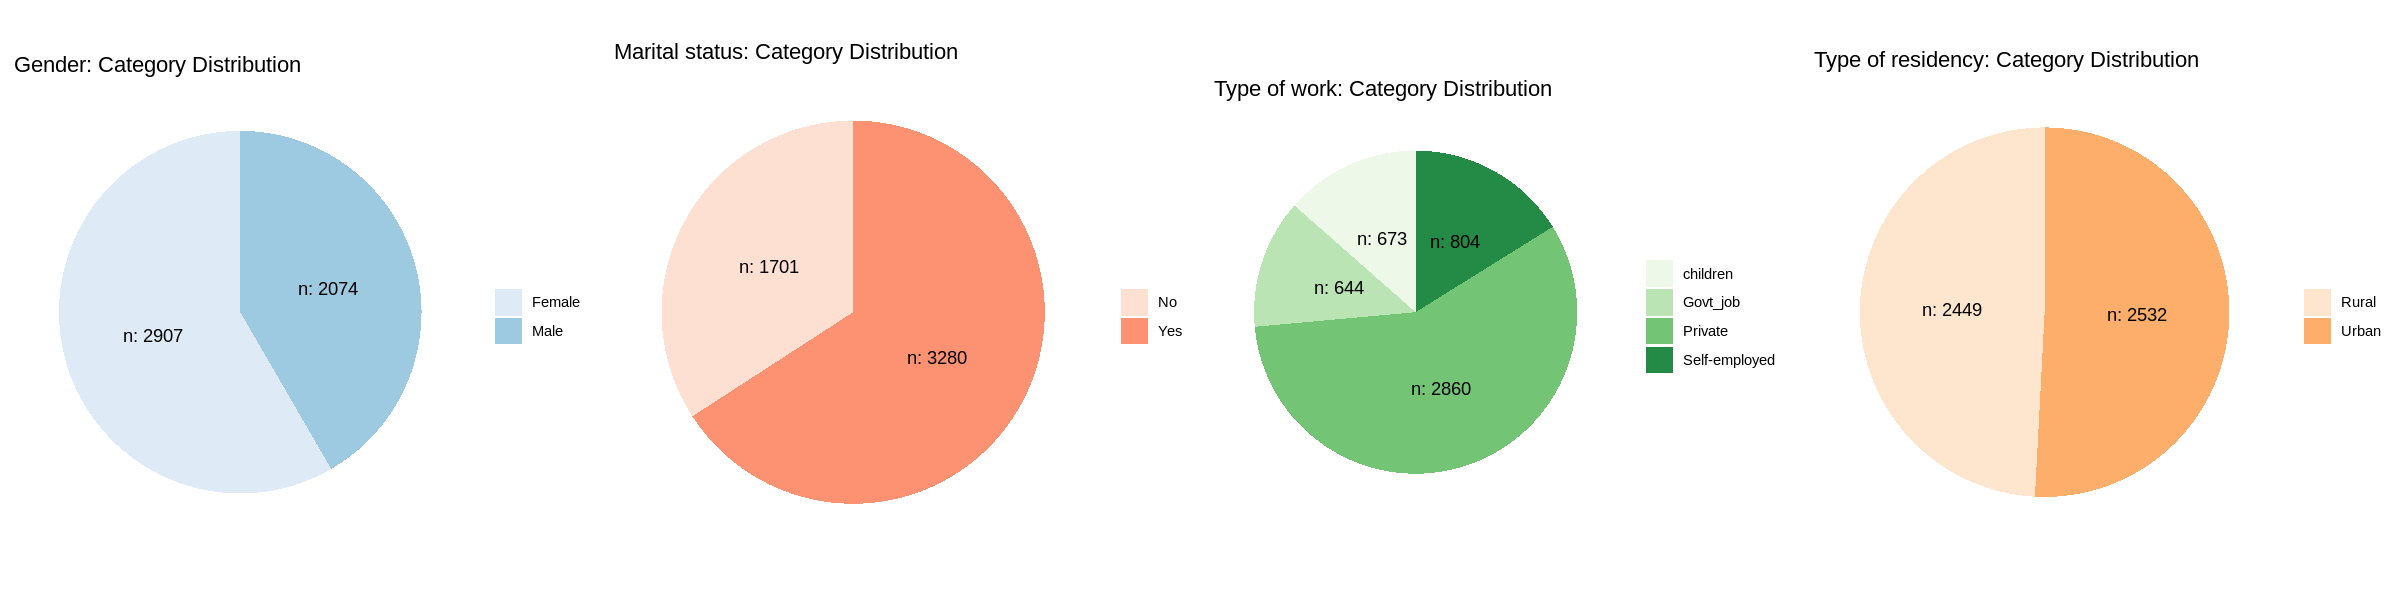

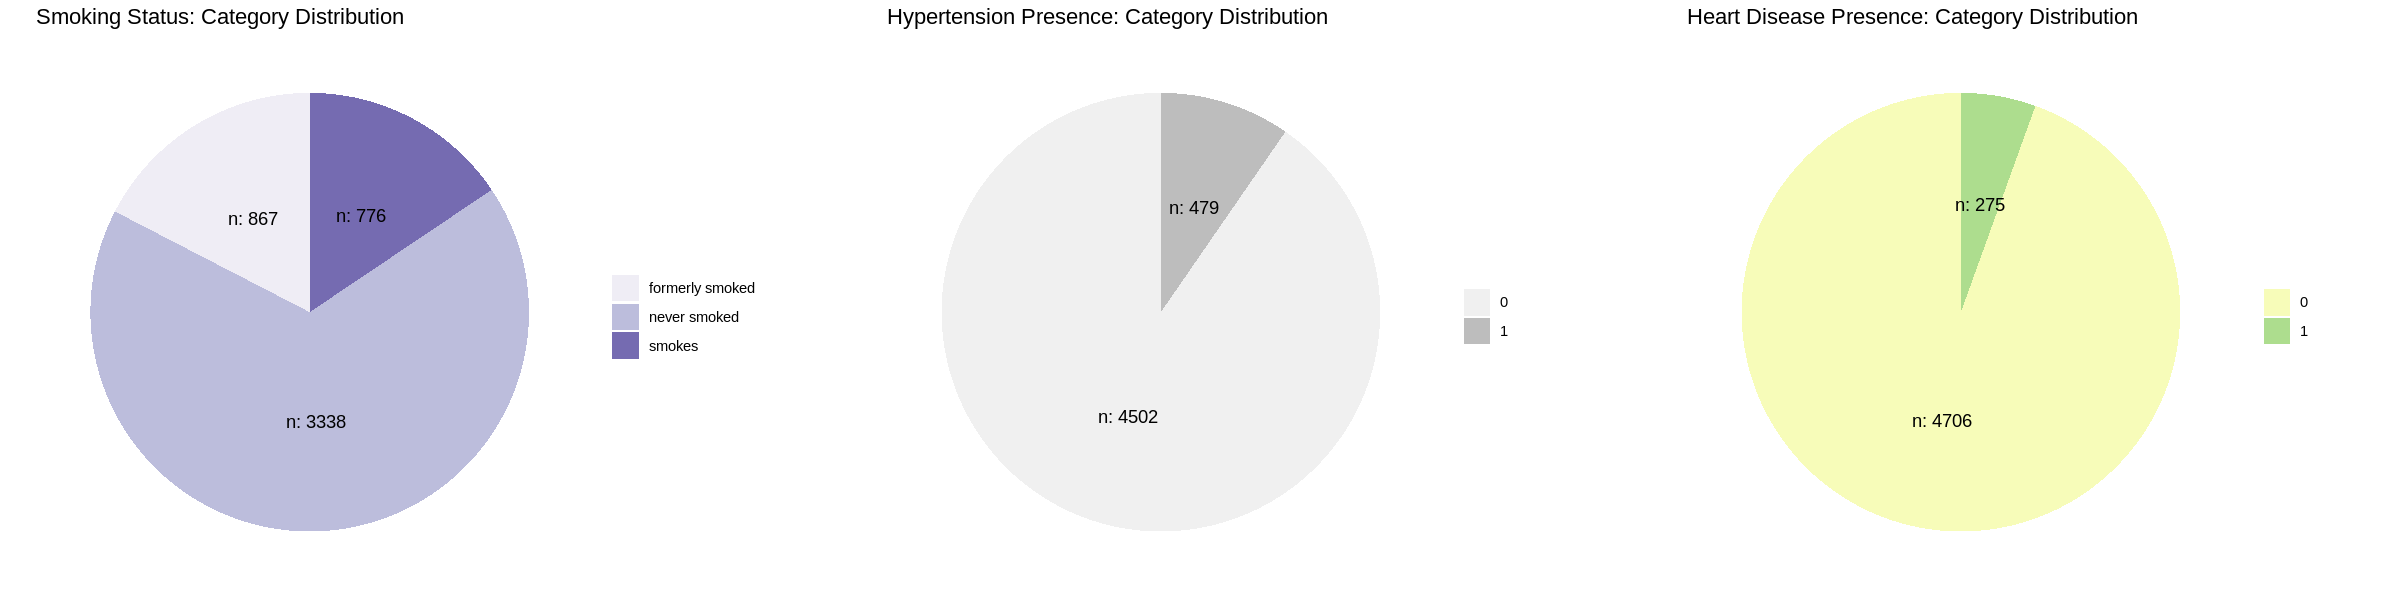

In [ ]:
options(repr.plot.width=20, repr.plot.height=5)

ggarrange(p_gender,p_marital,p_work,p_res,nrow=1)
ggarrange(p_smoke,p_hyp,p_hd,nrow = 1)

The charts show that the female, non-smoking, working at private company or married patients shown to have high number of stroke compared to their corresponding counterparts. Patients with hypertension, heart_disease or residence_type didn't show to have high number of having a stroke.

# **Numerical Data**

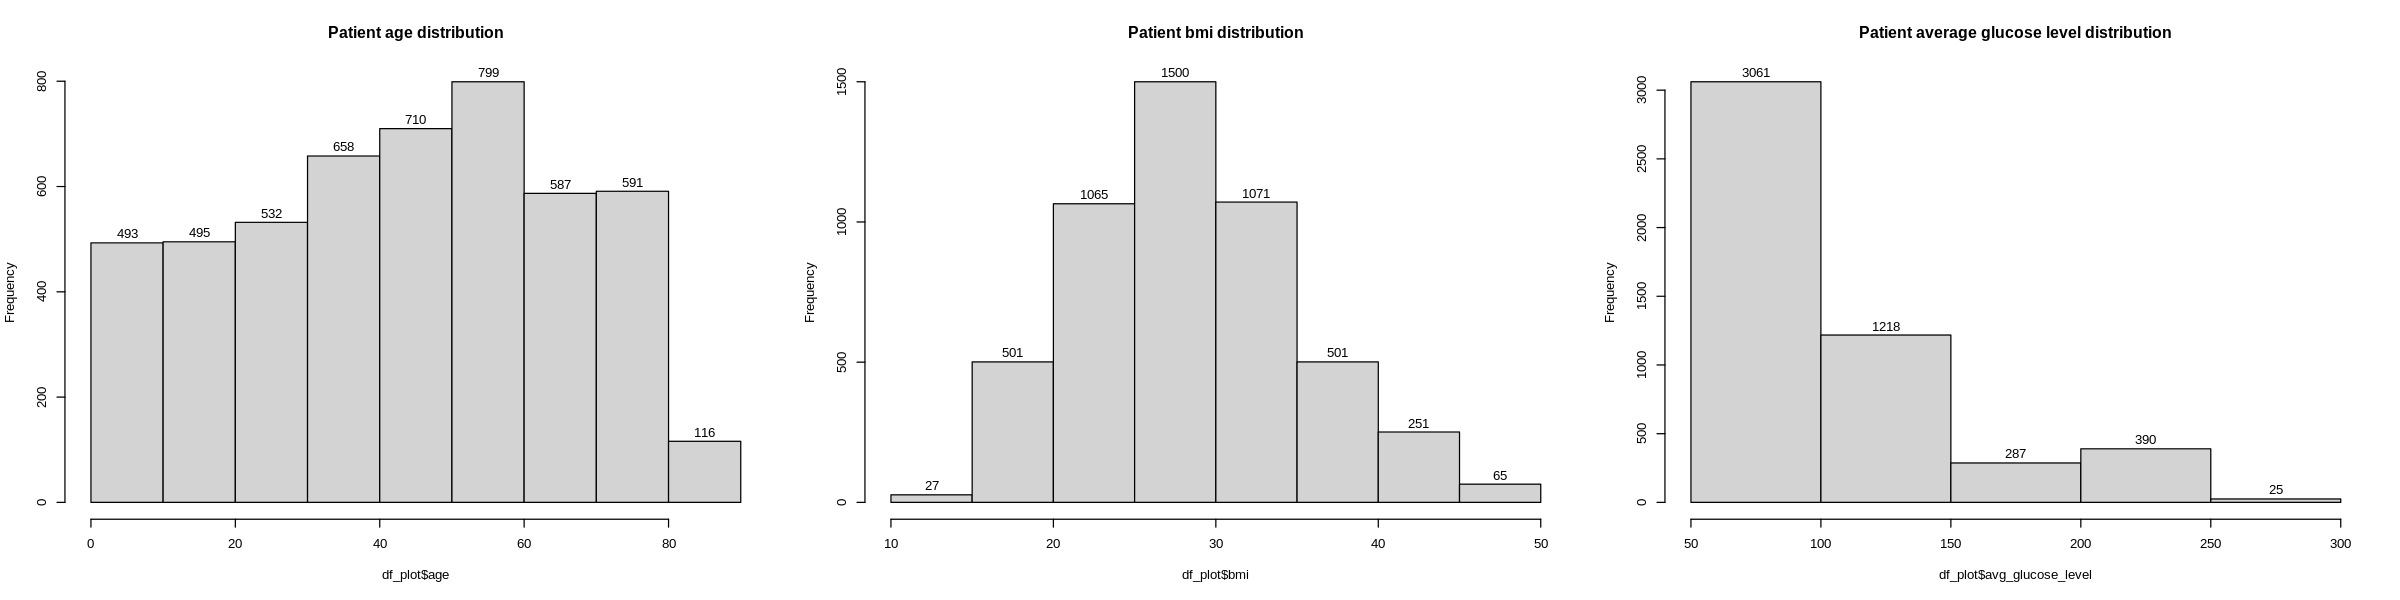

In [ ]:
# get the range of each numerical

options(repr.plot.width=20, repr.plot.height=5)
par(mfrow = c(1,3))

h<- hist(df_plot$age, main = "Patient age distribution",breaks = 6)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

h<- hist(df_plot$bmi, main = "Patient bmi distribution",breaks = 6)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

h<- hist(df_plot$avg_glucose_level, main = "Patient average glucose level distribution",breaks = 6)
text(h$mids,h$counts,labels=h$counts, adj=c(0.5, -0.5))

In [ ]:
p_age <- ggplot(df_plot, aes(x = age, y = ..density..)) +
  geom_histogram(col = 'blue',
                 fill = 'skyblue',
                 alpha = 0.2,
                 bins = 30) +
  geom_density(color = 'black') +
  ggtitle('Patient Age Distribution') +
  theme_classic()

p_agl <- ggplot(df_plot, aes(x = avg_glucose_level, y = ..density..)) +
  geom_histogram(col = 'red',
                 fill = 'red',
                 alpha = 0.1,
                 bins = 30) +
  geom_density(color = 'black') +
  ggtitle('Patient Average Glucose Level Distribution') +
  theme_classic()

p_bmi <- ggplot(df_plot, aes(x = bmi, y = ..density..)) +
  geom_histogram(col = 'green',
                 fill = 'green',
                 alpha = 0.2,
                 bins = 30) +
  geom_density(color = 'black') +
  ggtitle("Patient BMI Distribution") +
  theme_classic()

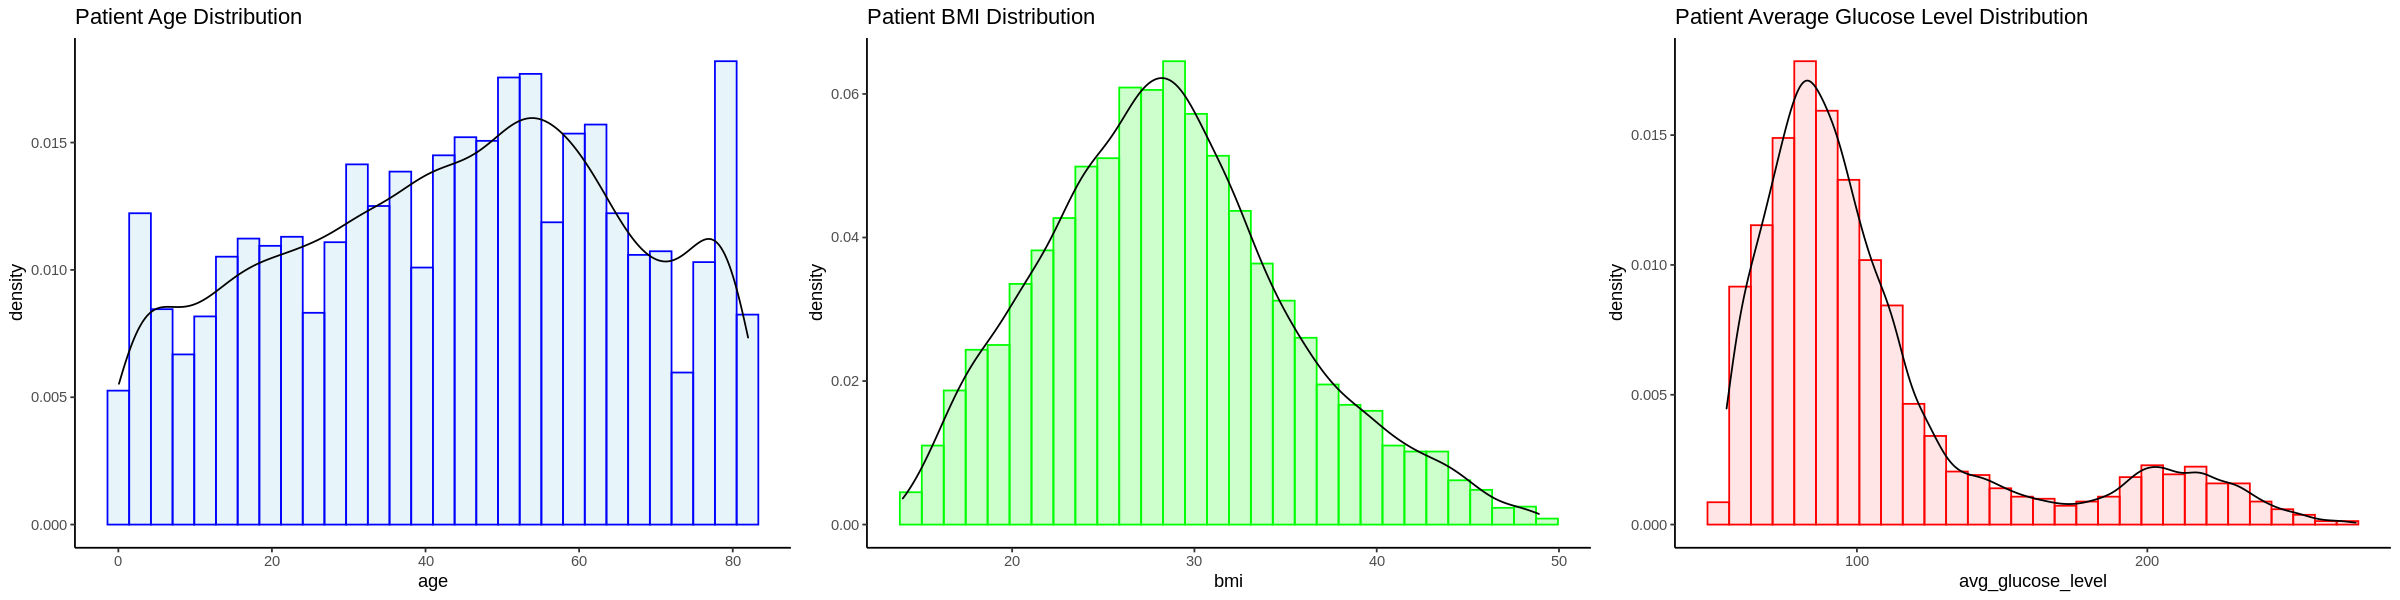

In [ ]:
options(repr.plot.width=20, repr.plot.height=5)

ggarrange(p_age,p_bmi,p_agl,nrow = 1)

The age of sampled population of patients are aged < 85, with most are between 40-60 and ~ 80 years old.
The sampled patient bmi are normally distributed with center = ~30
The glucose level skewed to the right with obvious 2 peaks at ~100 and ~200 glucose level.

# **UNDERSTANDING THE RELATIONSHIP**

In [ ]:
# create new parameter of categorical data based on age and bmi
# age_group
df <- df %>%
  mutate(age_group = case_when(
  age < 13 ~ "children",
  age >= 13 & age < 18 ~ "teenager",
  age >= 18 & age < 30 ~ "young adult",
  age >=30 & age < 60 ~ "adult",
  age >= 60 ~ "elderly") %>% as.factor)

# bmi_class
df <- df %>%
  mutate(
  bmi_class = case_when(
    bmi < 18.5 ~ "Underweight",
    bmi >= 18.5 & bmi <25 ~ "Normal",
    bmi >= 25 & bmi <30 ~ "Overweight",
    bmi >= 30 ~ "Obese")%>% as.factor
  )

head(df,2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_class,age_group
,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<fct>,<fct>
1,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese,elderly
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese,elderly


In [ ]:
stroke_gender <- ggplot(df_plot, aes(x = gender, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by gender")+theme_bw()

stroke_ageClass <- ggplot(df_plot, aes(x = age_group, fill = stroke)) + 
   geom_bar()+ggtitle("Stroke by age group")+theme_bw()

stroke_bmiClass <- ggplot(df_plot, aes(x = bmi_class, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by bmi category")+theme_bw()

stroke_hypertension <- ggplot(df_plot, aes(x = hypertension, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by hypertension")+theme_bw()

stroke_heart <- ggplot(df_plot, aes(x = heart_disease, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by heart disease")+theme_bw()

stroke_resident <- ggplot(df_plot, aes(x = Residence_type, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by type of resident")+theme_bw()

stroke_marital <- ggplot(df_plot, aes(x = ever_married, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by type marital status")+theme_bw()

stroke_work <- ggplot(df_plot, aes(x = work_type, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by type of work")+theme_bw()

stroke_smoking <- ggplot(df_plot, aes(x = smoking_status, fill = stroke)) + 
  geom_bar()+ggtitle("Stroke by smoking status")+theme_bw()

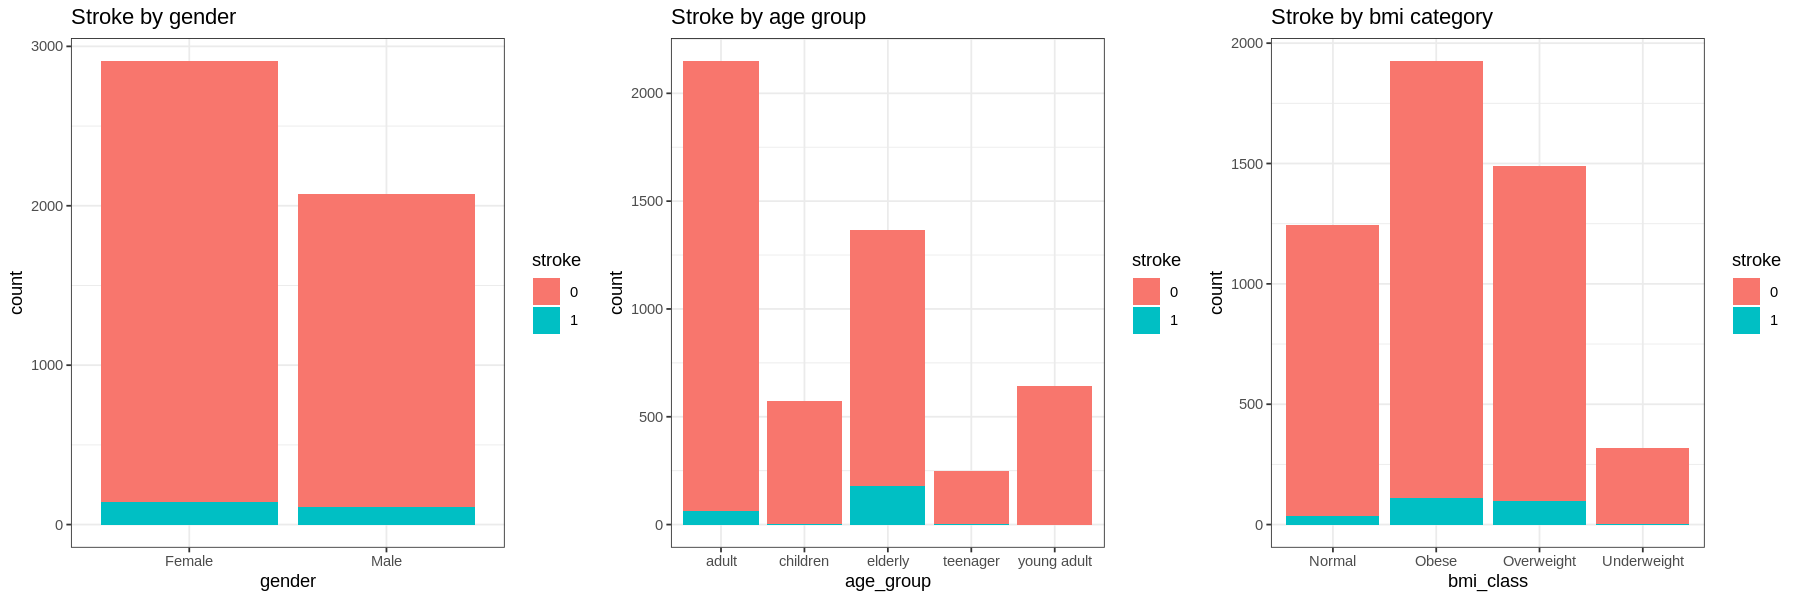

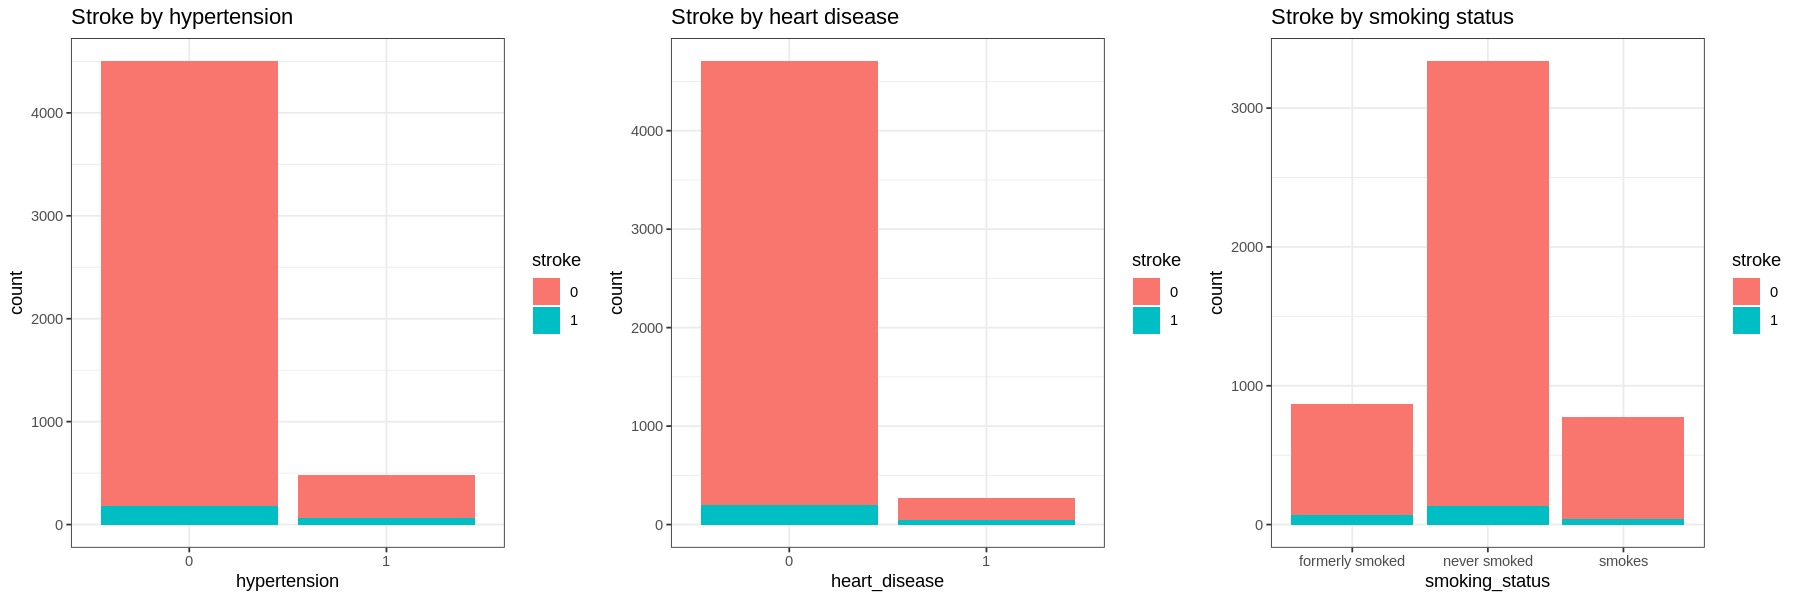

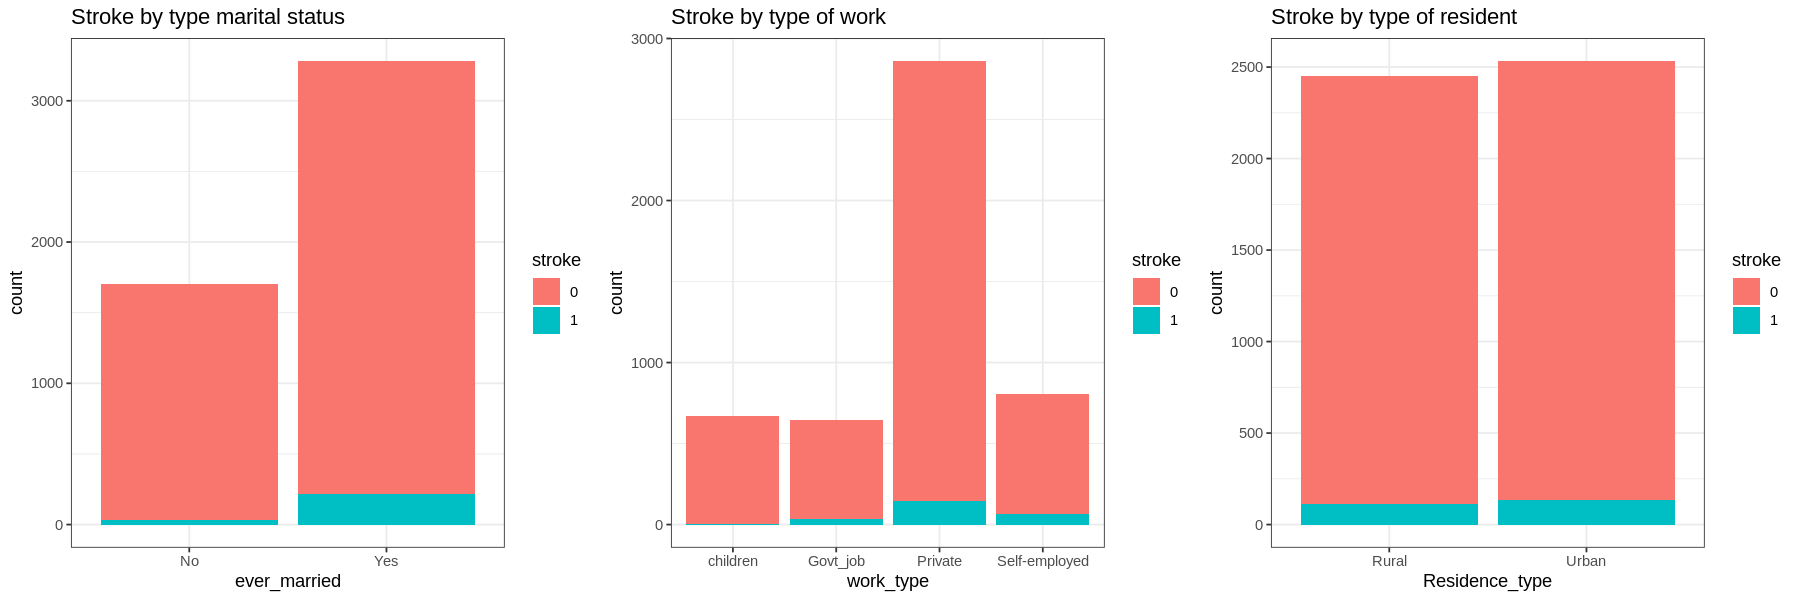

In [ ]:
options(repr.plot.width=15, repr.plot.height=5)

ggarrange(stroke_gender,stroke_ageClass,stroke_bmiClass, nrow=1)
ggarrange(stroke_hypertension,stroke_heart,stroke_smoking, nrow=1)
ggarrange(stroke_marital,stroke_work,stroke_resident, nrow=1)

Graphs show the number of patient with and without stroke for each factor.
Here we can see the amount of those who have had a stroke is a small portion of the sampled population as compared to those without stroke.

# **ANALYZE EACH LEVEL OF FACTORS PROPORTIONATE TO STROKE**

**CATEGORICAL**

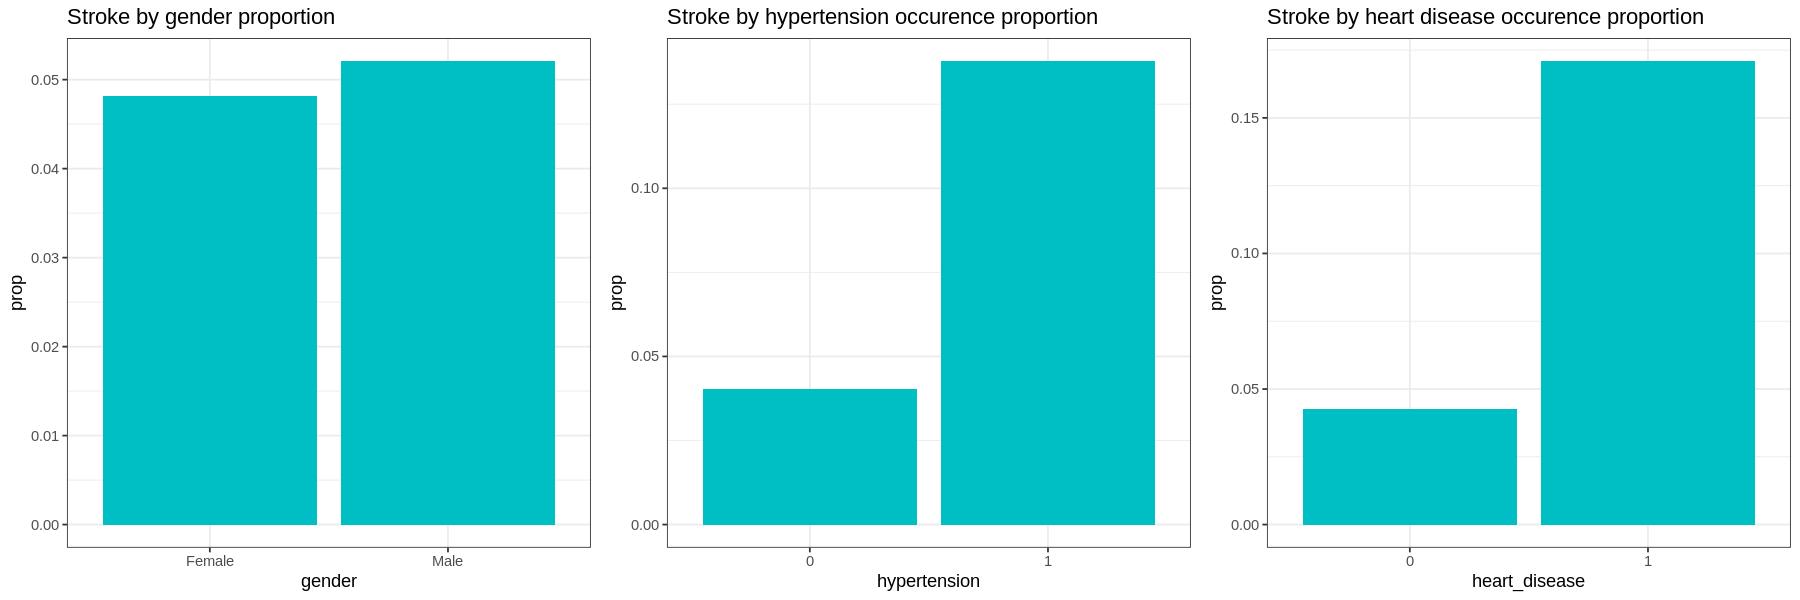

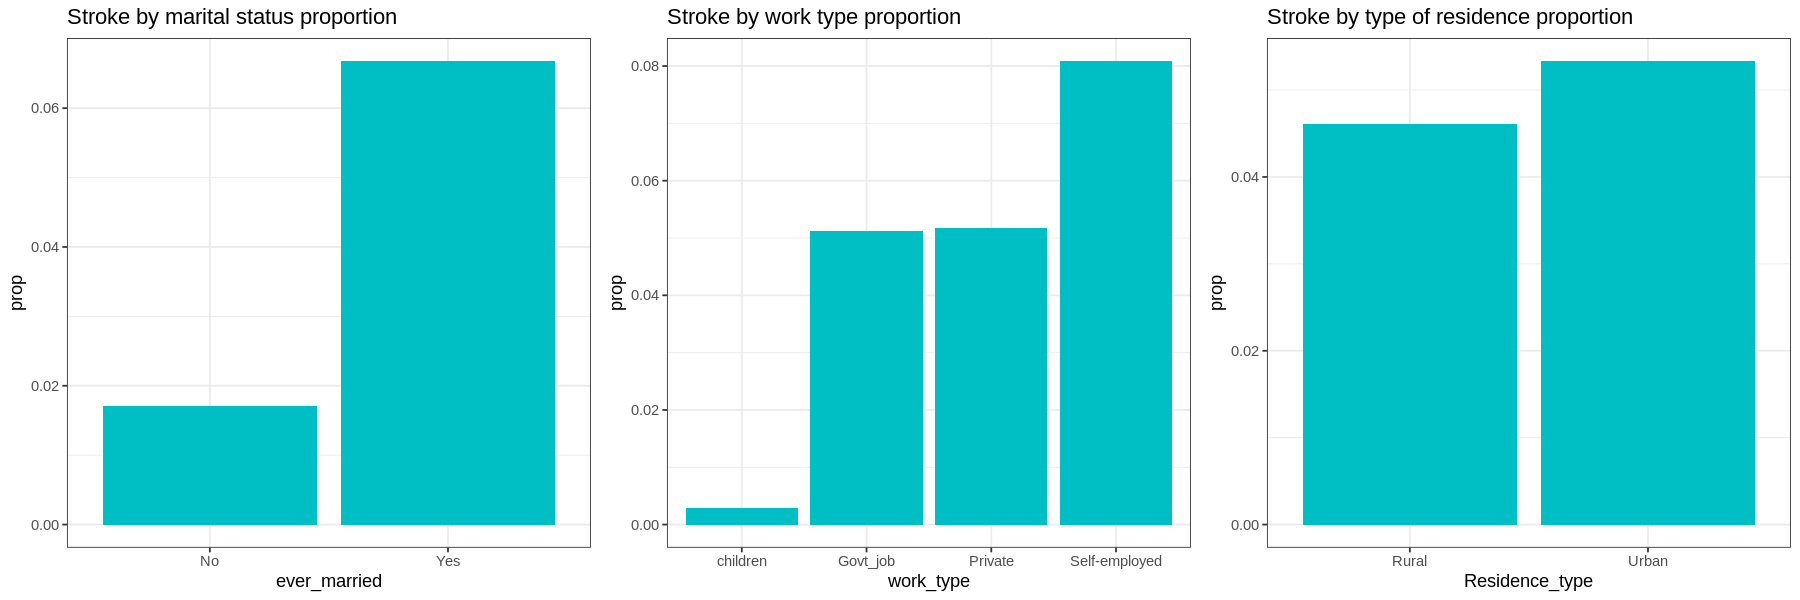

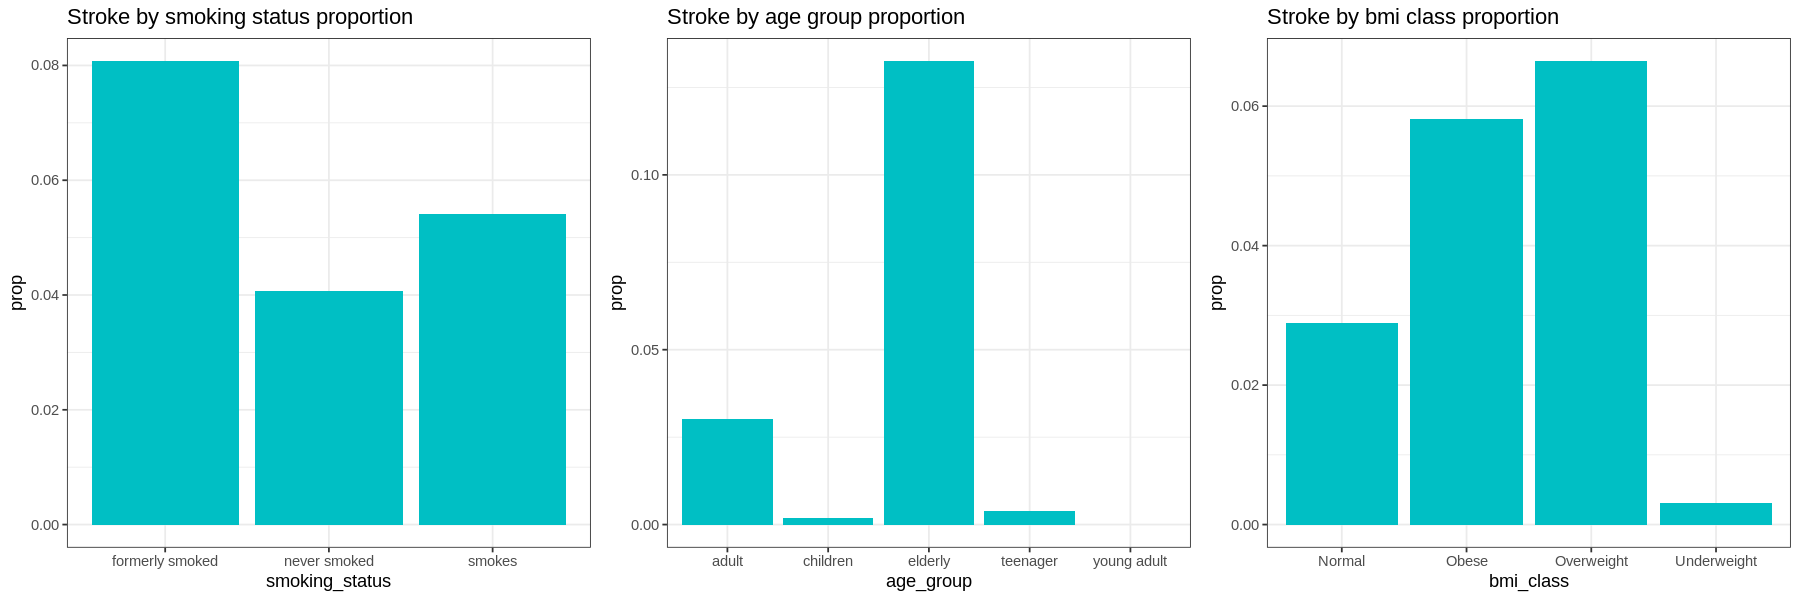

In [ ]:
# Proportion of Strokes for Each Factor
options(repr.plot.width=15, repr.plot.height=5)
dat_stroke <- df_plot
dat_prop <- dat_stroke %>%
  group_by(gender) %>%
  summarise(prop = sum(stroke == "1")/length(gender))

p1 <- dat_prop %>%
  ggplot(aes(x = gender, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by gender proportion")+theme_bw()

dat_prop <- dat_stroke %>%
  group_by(hypertension) %>%
  summarise(prop = sum(stroke == "1")/length(hypertension))

p2 <- dat_prop %>%
  ggplot(aes(x = hypertension, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by hypertension occurence proportion")+theme_bw()

dat_prop <- dat_stroke %>%
  group_by(heart_disease) %>%
  summarise(prop = sum(stroke == "1")/length(heart_disease))

p3 <- dat_prop %>%
  ggplot(aes(x = heart_disease, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by heart disease occurence proportion")+theme_bw()

dat_prop <- dat_stroke %>%
  group_by(ever_married) %>%
  summarise(prop = sum(stroke == "1")/length(ever_married))

p4 <- dat_prop %>%
  ggplot(aes(x = ever_married, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by marital status proportion")+theme_bw()

dat_prop <- dat_stroke %>%
  group_by(work_type) %>%
  summarise(prop = sum(stroke == "1")/length(work_type))

p5 <- dat_prop %>%
  ggplot(aes(x = work_type, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by work type proportion")+theme_bw()

dat_prop <- dat_stroke %>%
  group_by(Residence_type) %>%
  summarise(prop = sum(stroke == "1")/length(Residence_type))

p6 <- dat_prop %>%
  ggplot(aes(x = Residence_type, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by type of residence proportion")+theme_bw()

dat_prop <- dat_stroke %>%
  group_by(smoking_status) %>%
  summarise(prop = sum(stroke == "1")/length(smoking_status))

p7 <- dat_prop %>%
  ggplot(aes(x = smoking_status, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by smoking status proportion")+theme_bw()

dat_prop <- df %>%
  group_by(age_group) %>%
  summarise(prop = sum(stroke == "1")/length(age_group))

p8 <- dat_prop %>%
  ggplot(aes(x = age_group, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by age group proportion")+theme_bw()

dat_prop <- df %>%
  group_by(bmi_class) %>%
  summarise(prop = sum(stroke == "1")/length(bmi_class))

p9 <- dat_prop %>%
  ggplot(aes(x = bmi_class, y = prop)) +
  geom_col(fill = "#00BFC4")+ggtitle("Stroke by bmi class proportion")+theme_bw()

ggarrange(p1,p2,p3,nrow = 1)
ggarrange(p4,p5,p6,nrow = 1)
ggarrange(p7,p8,p9,nrow = 1)

Gender and residence type do not appear to have much difference in occurrences of strokes. 

Those with hypertension, heart disease, or those who have been married have a much higher proportion of their populations having had a stroke.

In terms of work type, Children have very low occurrences of strokes. There is little difference in the proportions of those who work in government and those who work in the private sector. Self employed have a higher proportion than both of these sectors.

Current smokers have a higher proportion of their population having had a stroke than those who have never smoked. Former smokers have a higher occurrence of strokes than current smokers. Those with unknown smoking have a low occurrence of strokes.

Elderly at age group has higher proportion of having stroke, followed by adult group. Interestingly, occurence of stroke in children is higher than young adult.

Patient with higher class BMI have higher proprtion of having stroke. Both overweight and obese people have high occurence of stroke with overweight slightly higher than obese patient. Those underweight almost never have a stroke.

**NUMERICAL**

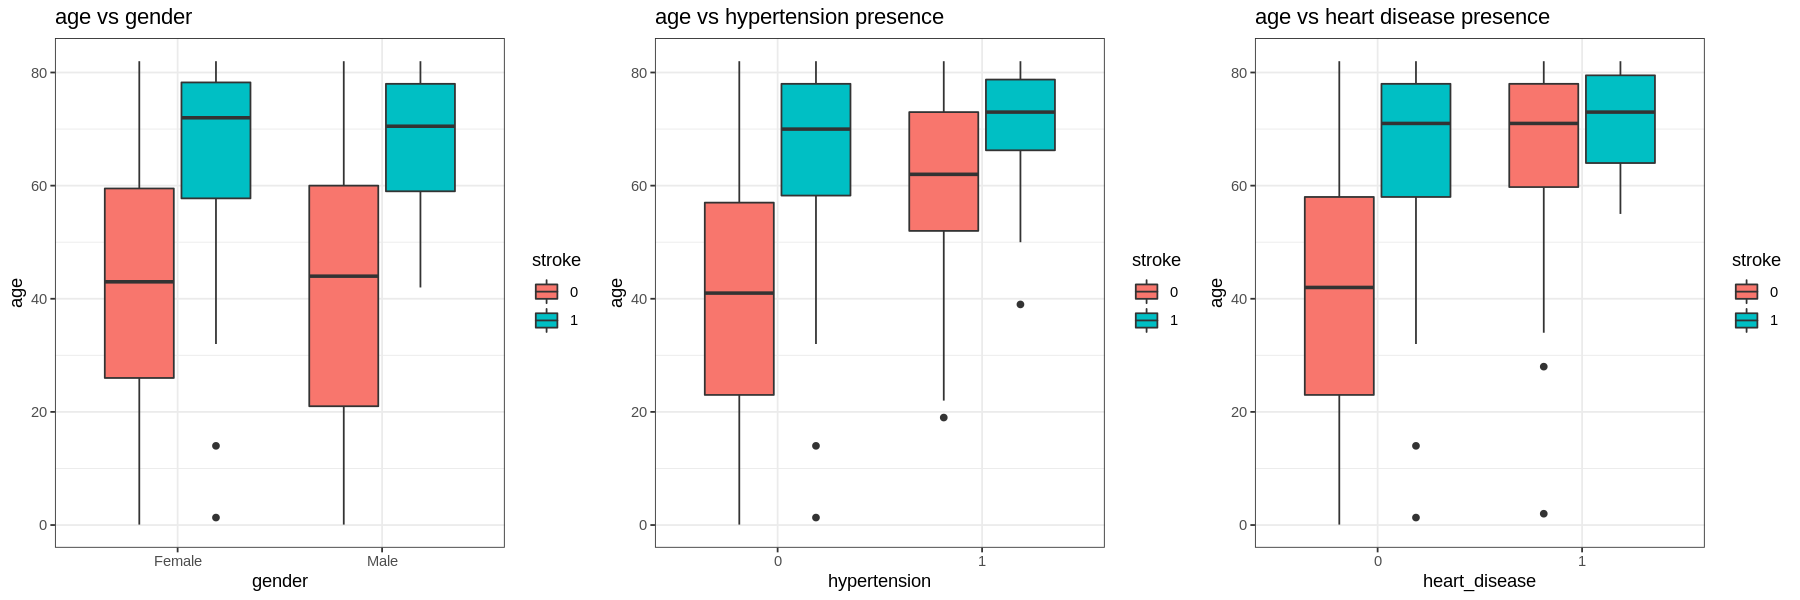

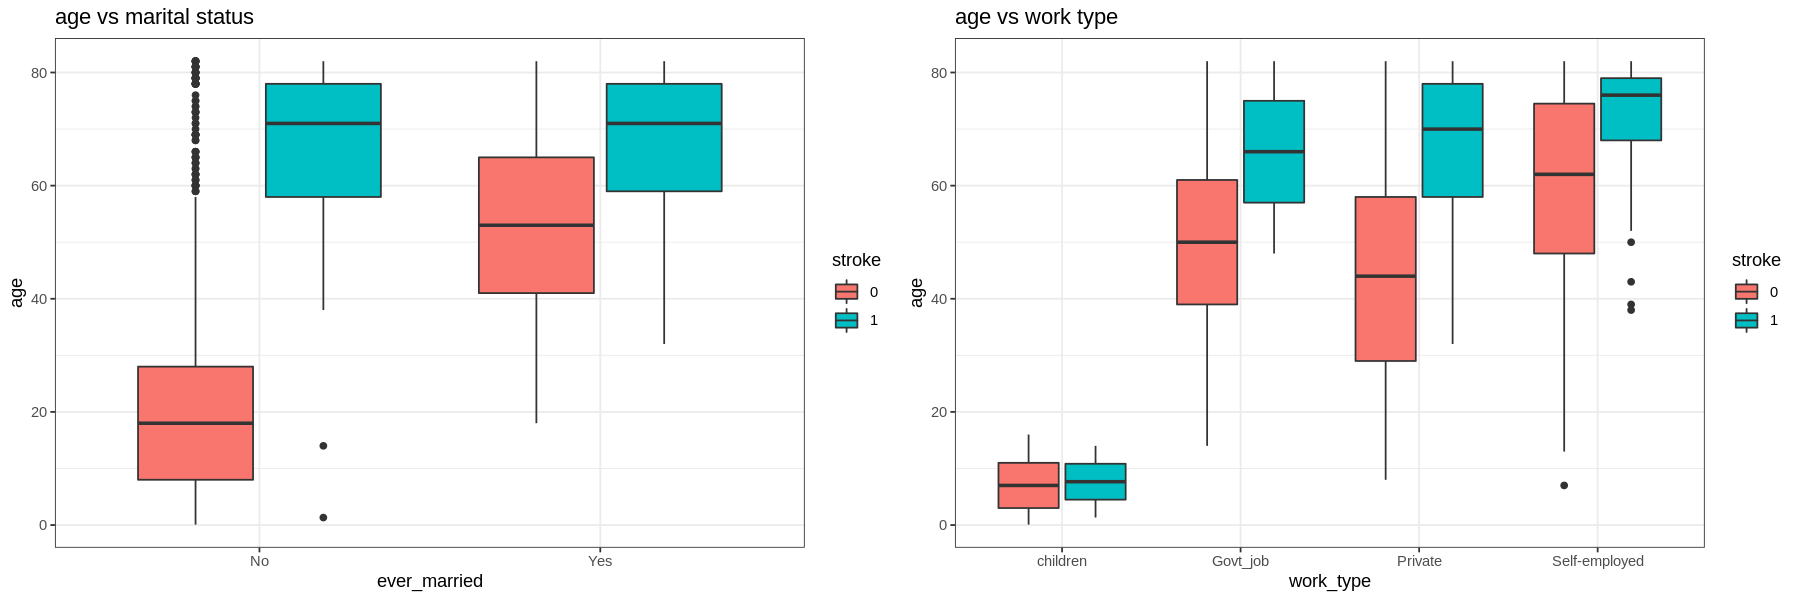

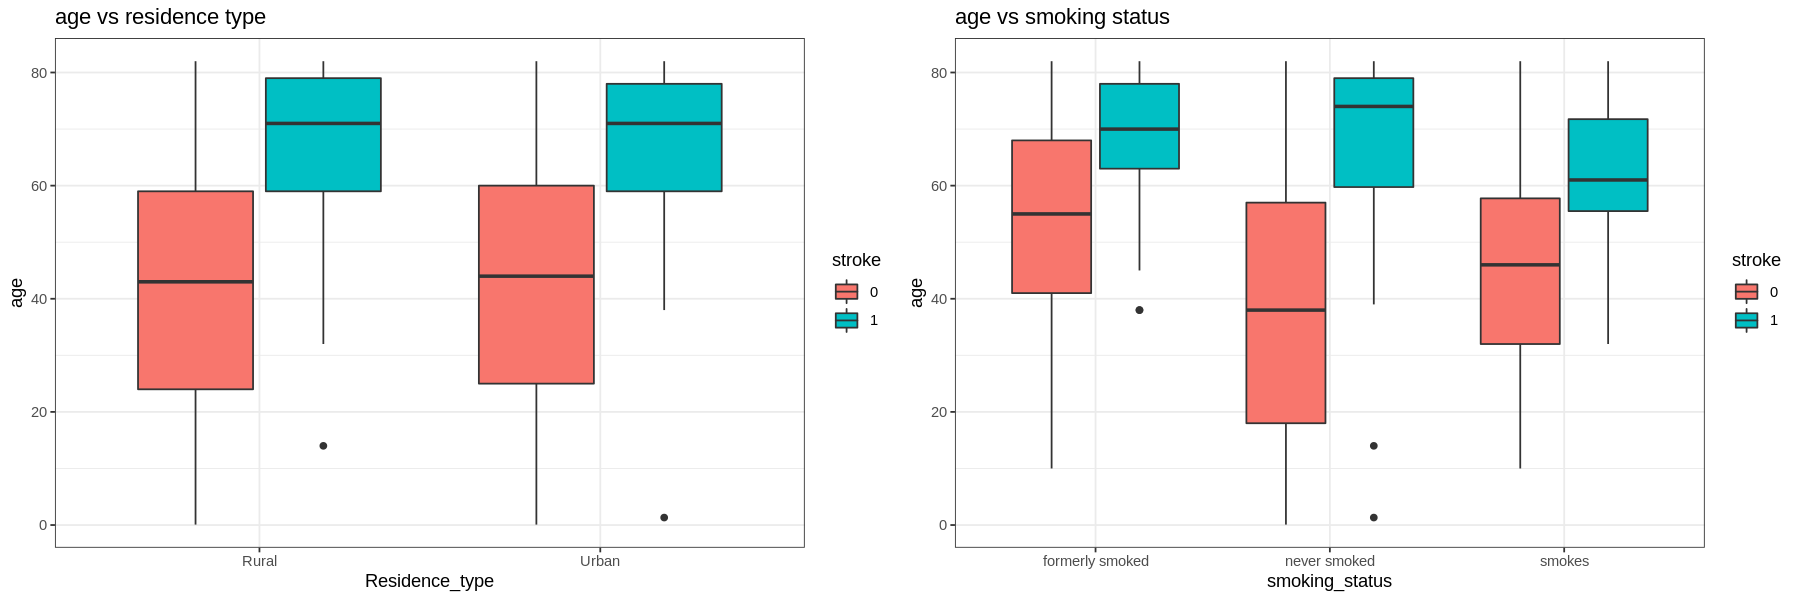

In [ ]:
# age with other factor to stroke
dat_stroke <- df_plot

p1 <- dat_stroke %>%
  ggplot(aes(x = gender, y = age, fill = stroke)) +
  geom_boxplot()+theme_bw()+ ggtitle("age vs gender")
 

p2 <- dat_stroke %>%
  ggplot(aes(x = hypertension, y = age, fill = stroke)) +
  geom_boxplot() +theme_bw() + ggtitle("age vs hypertension presence")

p3 <- dat_stroke %>%
  ggplot(aes(x = heart_disease, y = age, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("age vs heart disease presence")

p4 <- dat_stroke %>%
  ggplot(aes(x = ever_married, y = age, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("age vs marital status")


p5 <- dat_stroke %>%
  ggplot(aes(x = work_type, y = age, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("age vs work type")


p6 <- dat_stroke %>%
  ggplot(aes(x = Residence_type, y = age, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("age vs residence type")

p7 <- dat_stroke %>%
  ggplot(aes(x = smoking_status, y = age, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("age vs smoking status")

options(repr.plot.width=15, repr.plot.height=5)
ggarrange(p1,p2,p3,nrow = 1)
ggarrange(p4,p5,nrow = 1)
ggarrange(p6,p7,nrow = 1)

For all levels in each factor those who have had a stroke are older.

Those with hypertension and heart disease are older than those who do not. Self-employed are also older than the other types of work.

Those who had a stroke and smoke are younger than those who quit or never smoked (but still had a stroke).

# **AVERAGE GLUCOSE LEVEL**

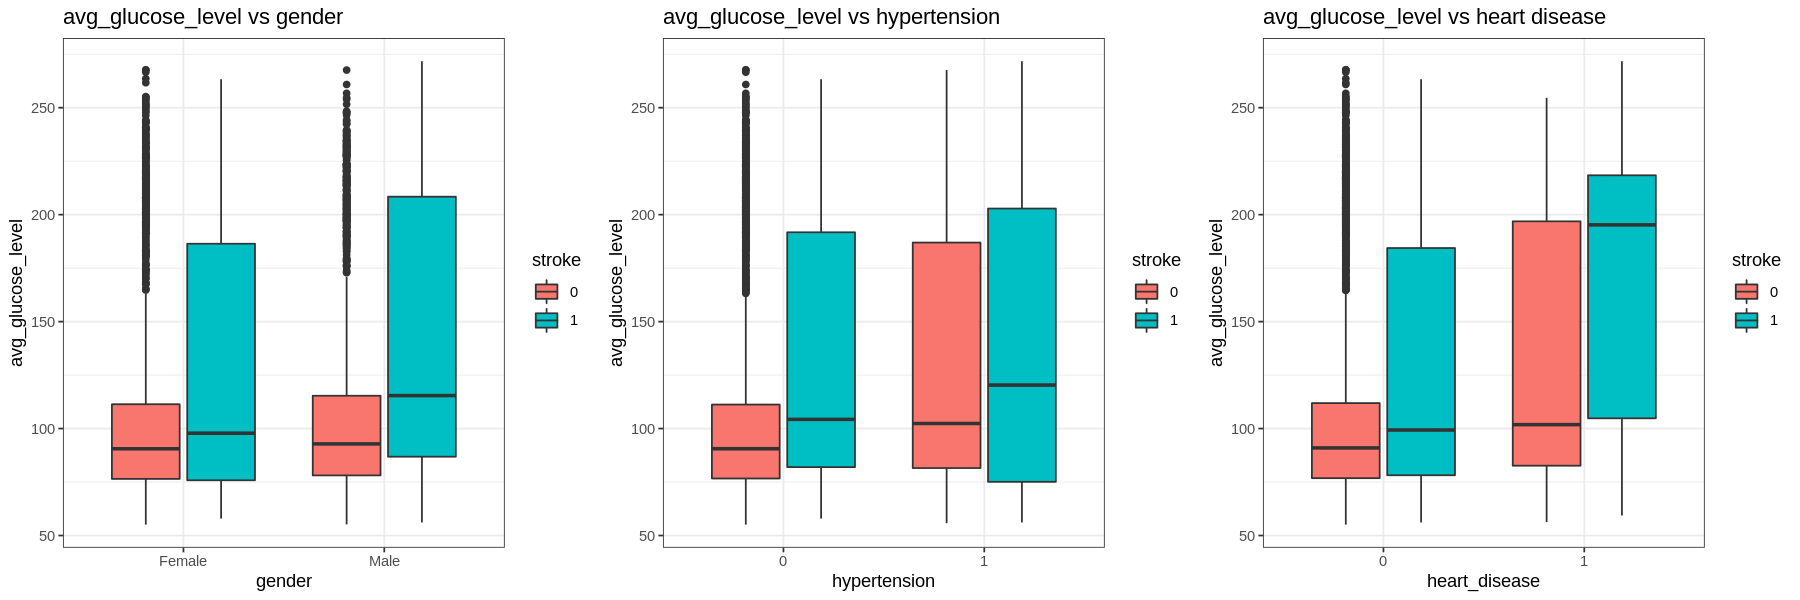

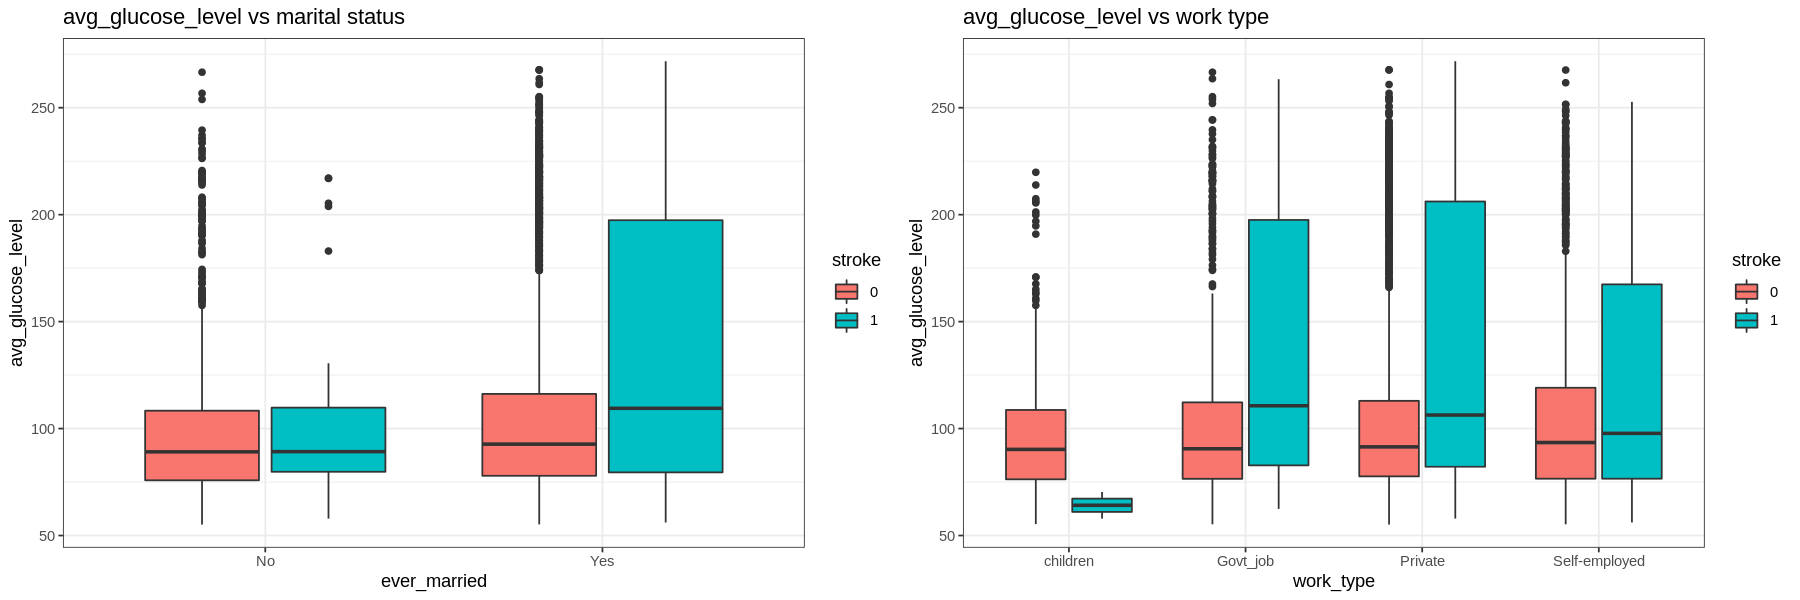

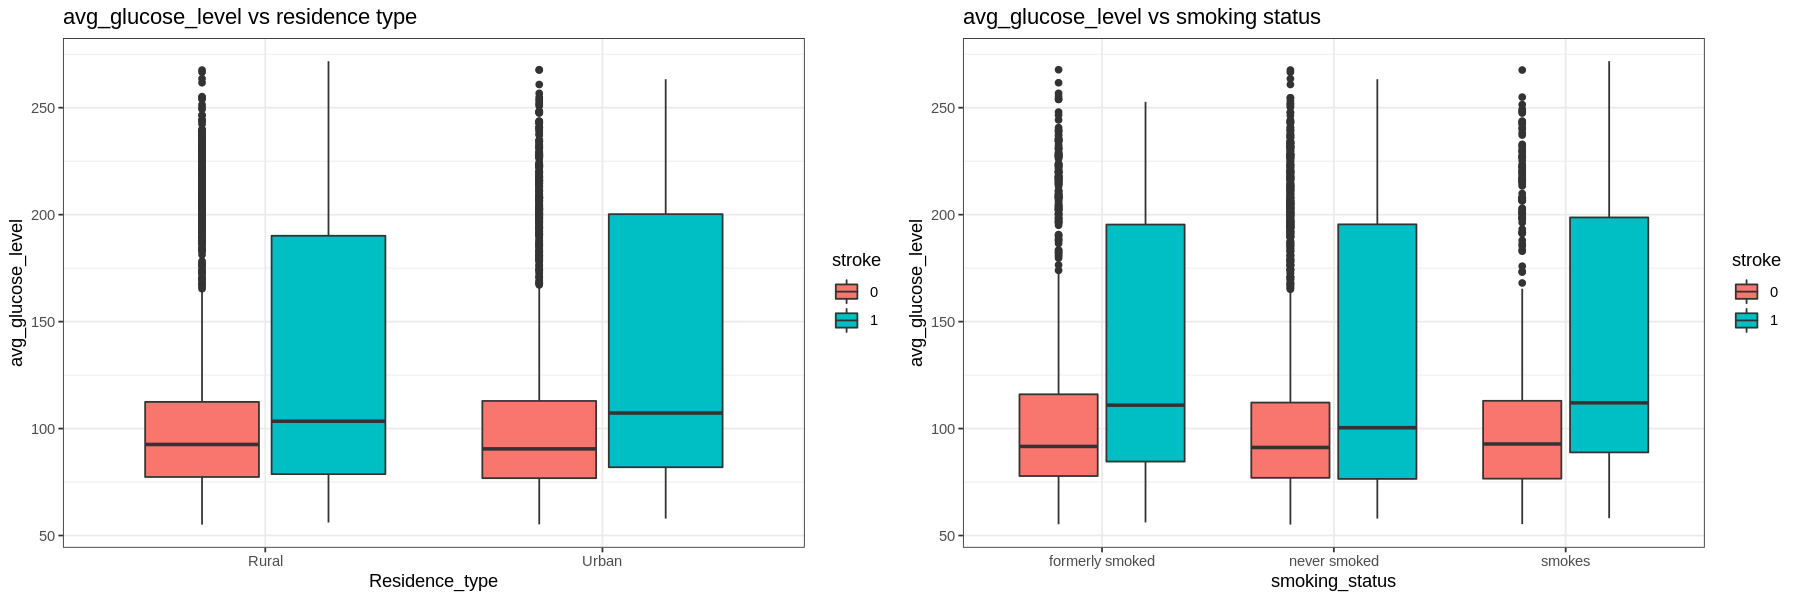

In [ ]:
# avg_glucose level
dat_stroke <- df_plot
p1 <- dat_stroke %>%
  ggplot(aes(x = gender, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs gender")


p2 <- dat_stroke %>%
  ggplot(aes(x = hypertension, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs hypertension")
  

p3 <- dat_stroke %>%
  ggplot(aes(x = heart_disease, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs heart disease")

p4 <- dat_stroke %>%
  ggplot(aes(x = ever_married, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs marital status")

p5 <- dat_stroke %>%
  ggplot(aes(x = work_type, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs work type")

p6 <- dat_stroke %>%
  ggplot(aes(x = Residence_type, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs residence type")
  

p7 <- dat_stroke %>%
  ggplot(aes(x = smoking_status, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("avg_glucose_level vs smoking status")

options(repr.plot.width=15, repr.plot.height=5)
ggarrange(p1,p2,p3,nrow = 1)
ggarrange(p4,p5,nrow = 1)
ggarrange(p6,p7,nrow = 1)

The IQR tends to go higher for those who had a stroke. Those with hypertension and heart disease have higher levels regardless of if a stroke was had or not.

# **BMI**

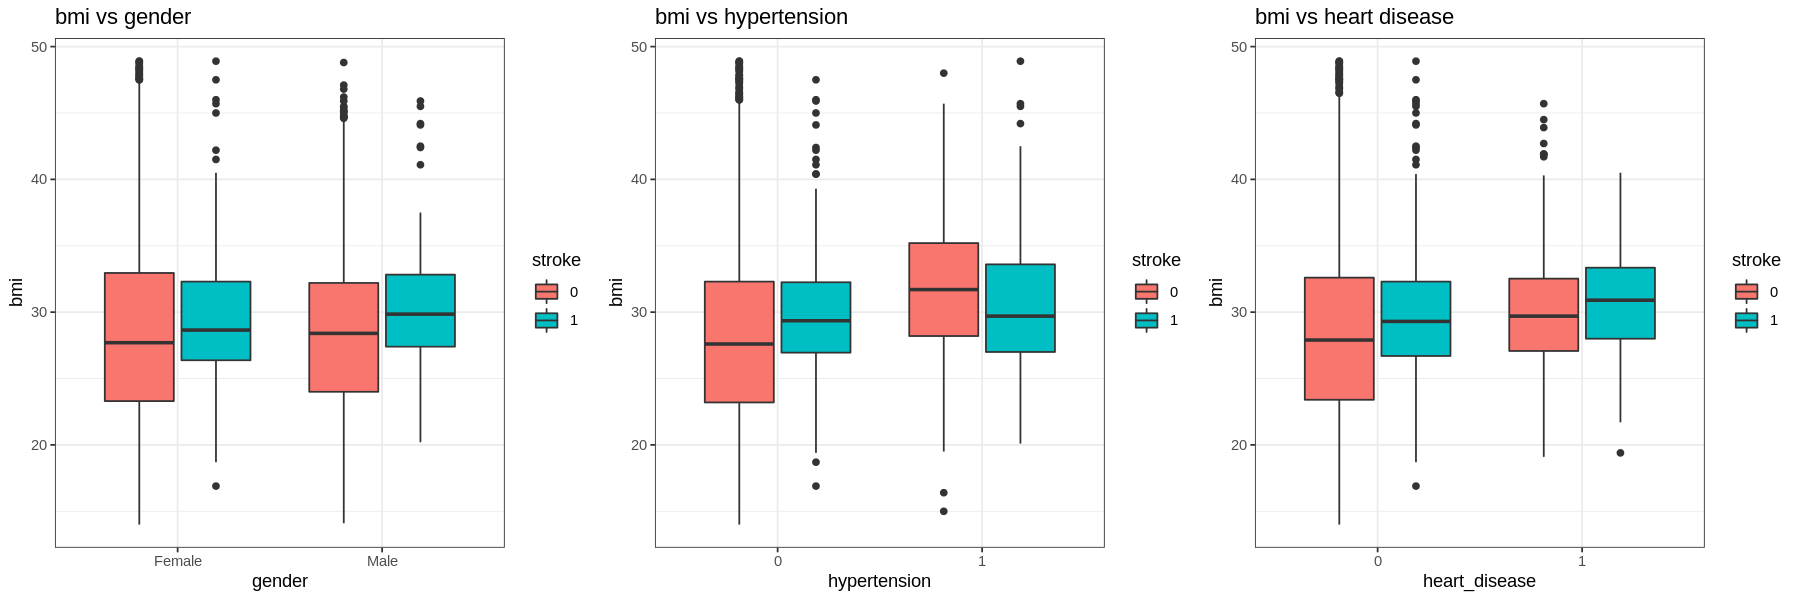

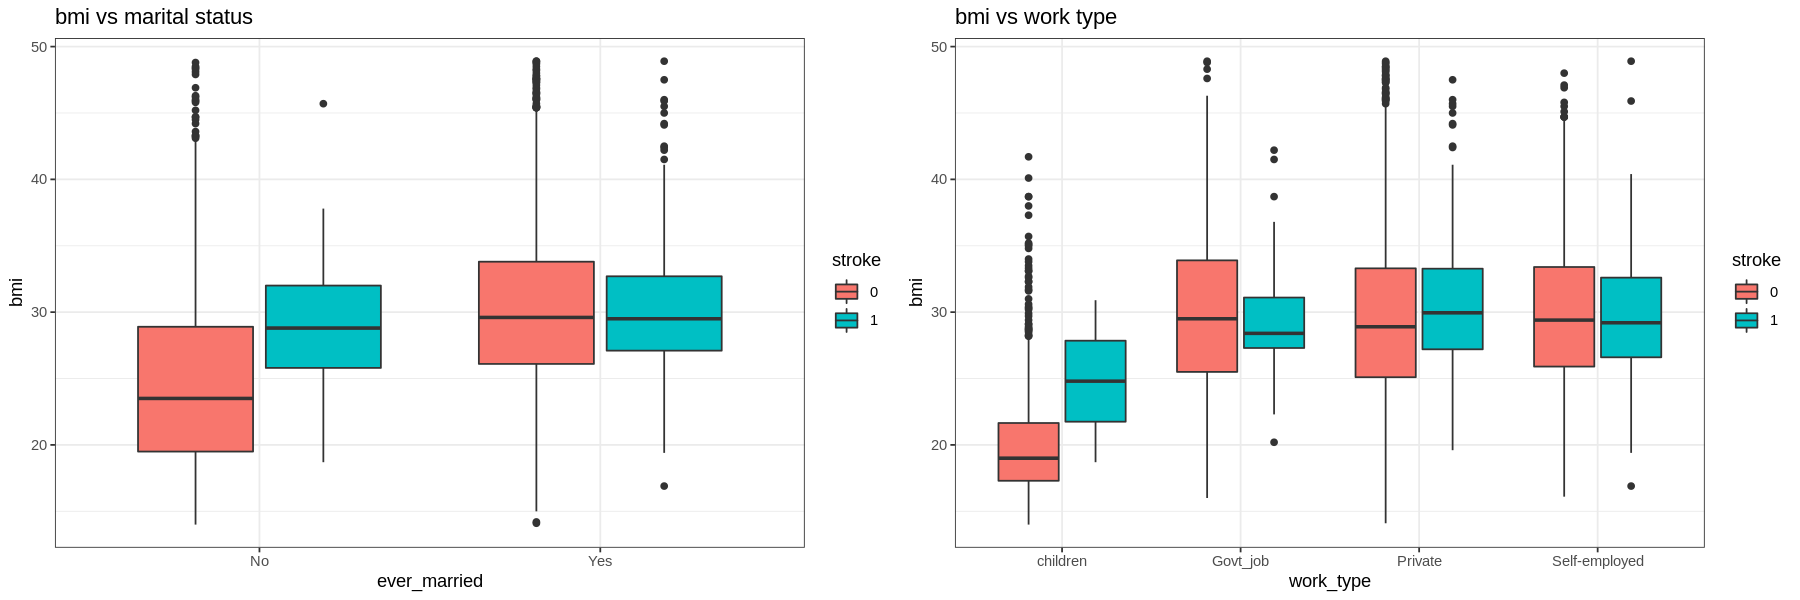

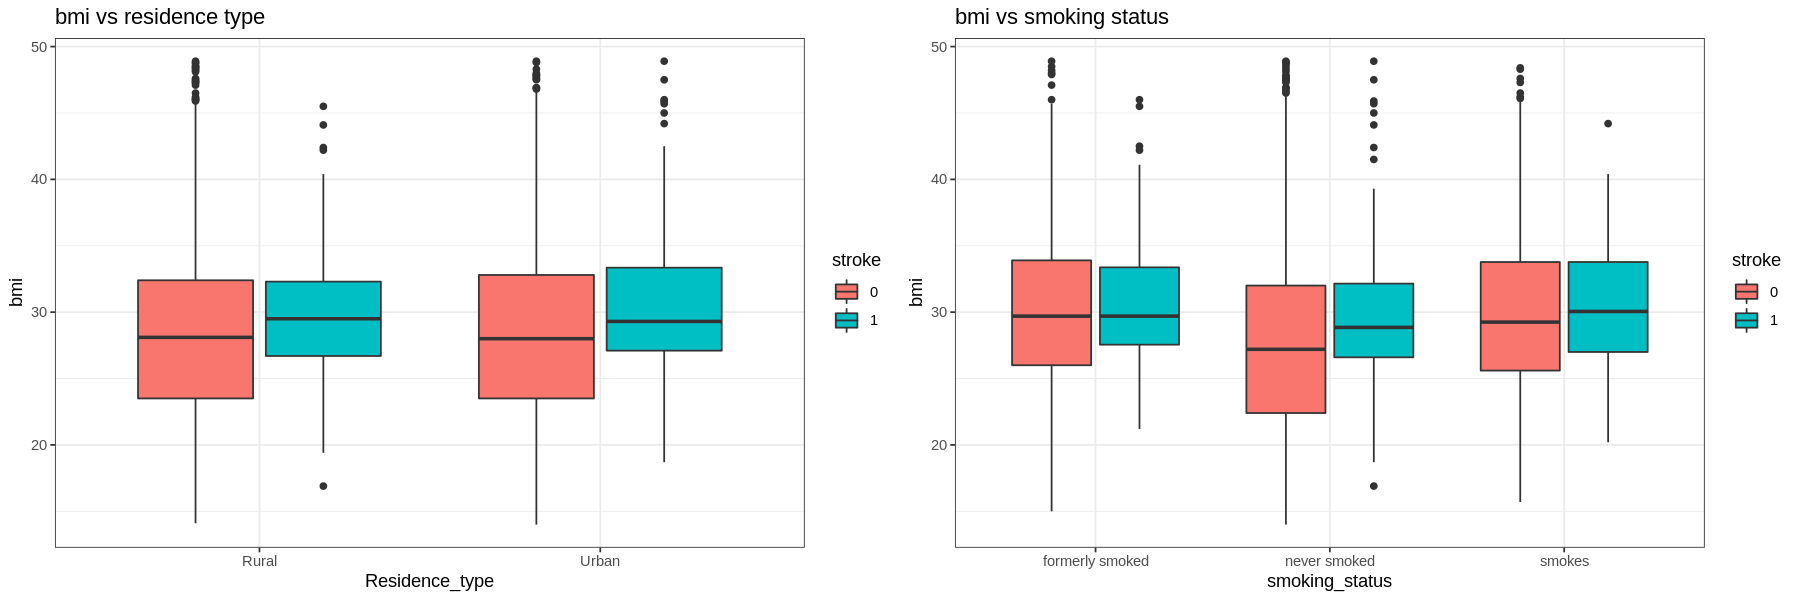

In [ ]:
dat_stroke <- df_plot
p1 <- dat_stroke %>%
  ggplot(aes(x = gender, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs gender")

p2 <- dat_stroke %>%
  ggplot(aes(x = hypertension, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs hypertension")

p3 <- dat_stroke %>%
  ggplot(aes(x = heart_disease, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs heart disease")

p4 <- dat_stroke %>%
  ggplot(aes(x = ever_married, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs marital status")

p5 <- dat_stroke %>%
  ggplot(aes(x = work_type, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs work type")

p6 <- dat_stroke %>%
  ggplot(aes(x = Residence_type, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs residence type")

p7 <- dat_stroke %>%
  ggplot(aes(x = smoking_status, y = bmi, fill = stroke)) +
  geom_boxplot() +theme_bw()+ ggtitle("bmi vs smoking status")

options(repr.plot.width=15, repr.plot.height=5)
ggarrange(p1,p2,p3,nrow = 1)
ggarrange(p4,p5,nrow = 1)
ggarrange(p6,p7,nrow = 1)


There is not much difference in the BMI of those who had a stroke and those who had not.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



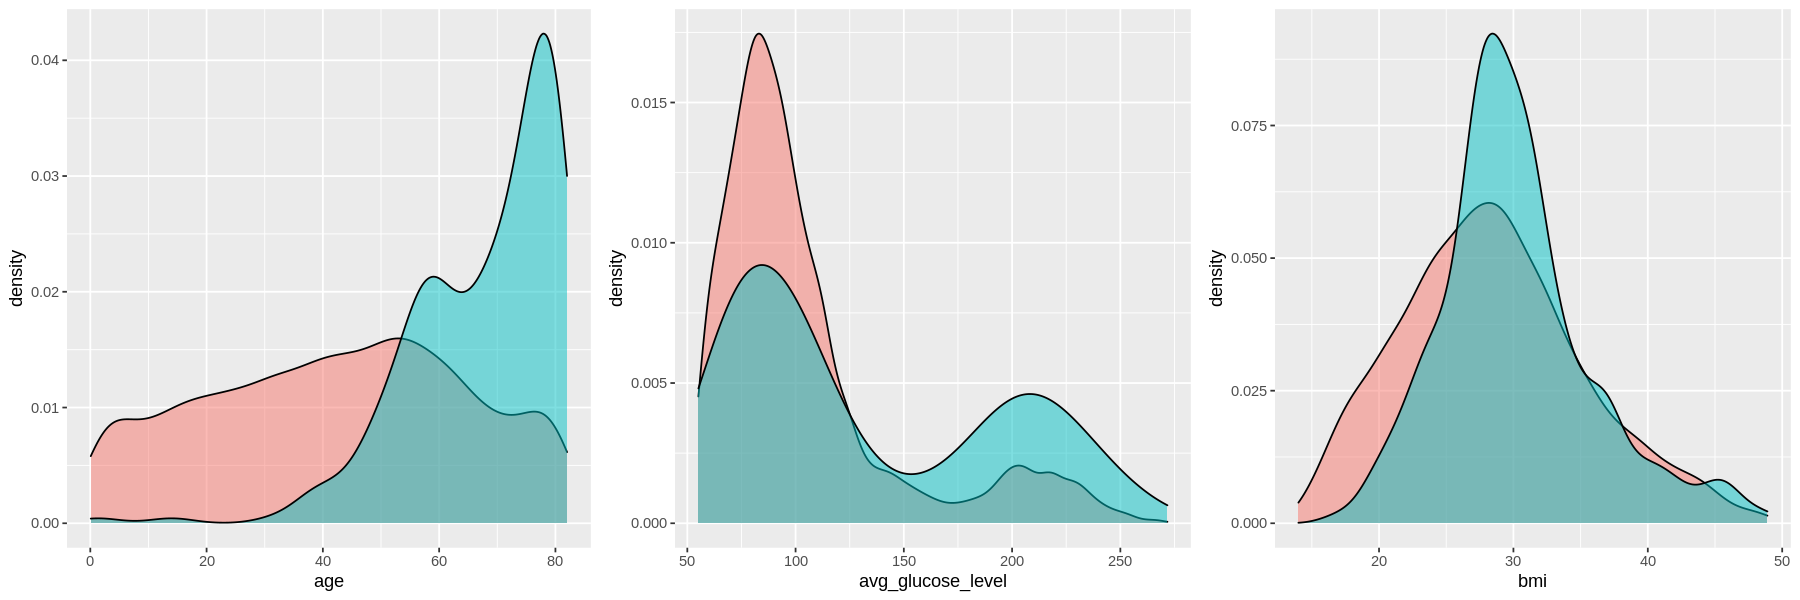

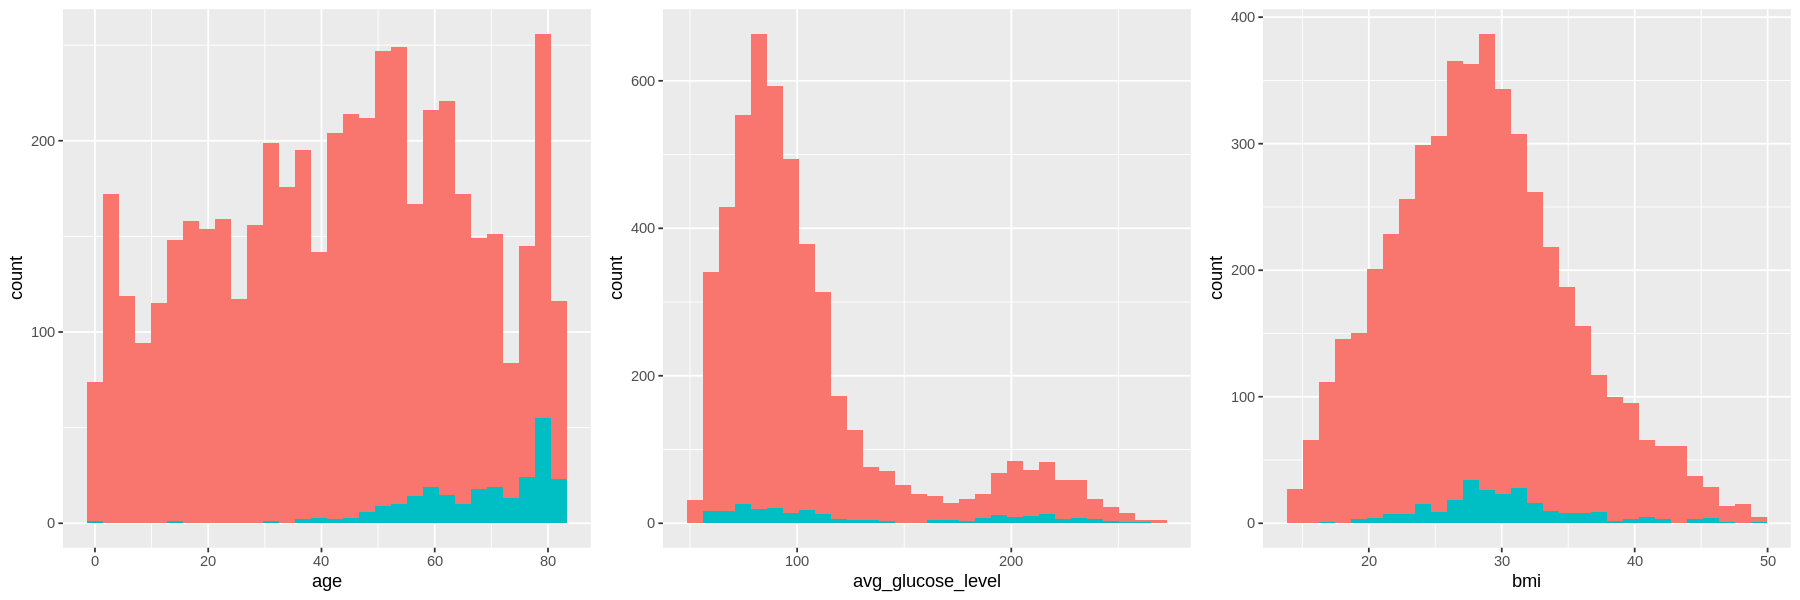

In [ ]:
dat_stroke <- df_plot
p1 <- dat_stroke %>%
  ggplot(aes(x = age, fill = stroke)) +
  geom_density(alpha = 0.5) +
  theme(legend.position="none")

p2 <- dat_stroke %>%
  ggplot(aes(x = avg_glucose_level, fill = stroke)) +
  geom_density(alpha = 0.5) +
  theme(legend.position="none")

p3 <- dat_stroke %>%
  ggplot(aes(x = bmi, fill = stroke)) +
  geom_density(alpha = 0.5) +
  theme(legend.position="none")

p4 <- dat_stroke %>%
  ggplot(aes(x = age, fill = stroke)) +
  geom_histogram() +
  theme(legend.position="none")

p5 <- dat_stroke %>%
  ggplot(aes(x = avg_glucose_level, fill = stroke)) +
  geom_histogram() +
  theme(legend.position="none")

p6 <- dat_stroke %>%
  ggplot(aes(x = bmi, fill = stroke)) +
  geom_histogram() +
  theme(legend.position="none")

# grid.arrange(grobs = list(p1, p2, p3,
#                           p4, p5, p6), 
#              nrow = 2,
#              top = "Distribution of Continuous Variables"
#              )
options(repr.plot.width=15, repr.plot.height=5)
ggarrange(p1,p2,p3,nrow = 1)
ggarrange(p4,p5,p6,nrow = 1)

As **age increases**, the amount of **strokes increases**.

The distribution for **average glucose level is bimodal** for **both stroke and no stroke** populations, with **peaks at the same values**. However the **density of strokes at higher glucose levels** is **higher than the density of no strokes at the same level**.

There is **no difference in the distribution of bmi between those who have had a stroke and those who have not**.


# **MACHINE LEARNING**

In [ ]:
install.packages("e1071")
install.packages("caTools")
install.packages("caret")
install.packages("caTools")
install.packages("party")
install.packages("magrittr")
install.packages("ROCR")
install.packages("class")

library(e1071)
library(caTools)
library(caret)
library(party)
library(magrittr)
library(class)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TH.data’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-libra

In [ ]:
# remove extra added columns if any
colnames(df_plot)
df <- df_plot[,-c(12,13)]
colnames(df)

[1] "gender"            "age"               "hypertension"     
 [4] "heart_disease"     "ever_married"      "work_type"        
 [7] "Residence_type"    "avg_glucose_level" "bmi"              
[10] "smoking_status"    "stroke"

[1] "gender"            "age"               "hypertension"     
 [4] "heart_disease"     "ever_married"      "work_type"        
 [7] "Residence_type"    "avg_glucose_level" "bmi"              
[10] "smoking_status"    "stroke"

In [ ]:
# set.seed(10)
divider <-sample.split(Y = df_plot$stroke,SplitRatio = 0.80)
train_data<-subset(df,subset = divider == TRUE)
test_data<-subset(df,subset = divider == FALSE)

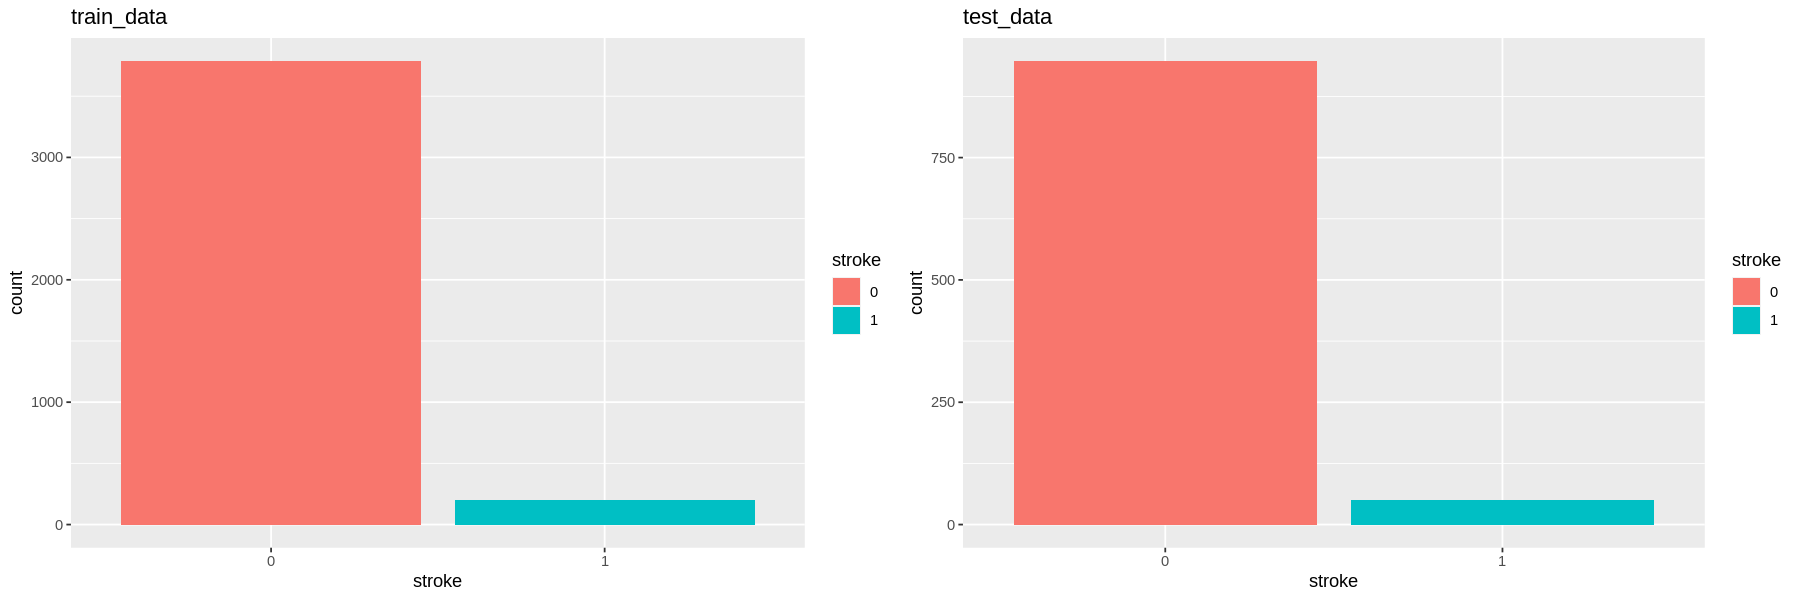

In [ ]:
p_train <- train_data %>%
  ggplot(aes(stroke,fill=stroke))+geom_bar()+ggtitle("train_data")

p_test <- test_data %>%
  ggplot(aes(stroke,fill=stroke))+geom_bar()+ggtitle("test_data")

ggarrange(p_train,p_test,nrow=1)

# **i. LOGISTIC REGRESSION**

In [ ]:
# Logistic Regression
model_glm <- glm(
  stroke ~ .,
  data = train_data,
  family = binomial
)
summary(model_glm)


Call:
glm(formula = stroke ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1595  -0.3216  -0.1613  -0.0885   3.5141  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -6.802715   0.808533  -8.414   <2e-16 ***
genderMale                 -0.032563   0.159085  -0.205   0.8378    
age                         0.077944   0.006736  11.571   <2e-16 ***
hypertension1               0.456903   0.183628   2.488   0.0128 *  
heart_disease1              0.332349   0.215760   1.540   0.1235    
ever_marriedYes            -0.215205   0.251486  -0.856   0.3921    
work_typeGovt_job          -1.654993   0.870531  -1.901   0.0573 .  
work_typePrivate           -1.506210   0.852386  -1.767   0.0772 .  
work_typeSelf-employed     -1.810327   0.875775  -2.067   0.0387 *  
Residence_typeUrban         0.029578   0.155415   0.190   0.8491    
avg_glucose_level           0.002983   0.

In [ ]:
# predict test data
predict_glm <- predict(model_glm, test_data[-11], type = 'response')
predict_glm<- ifelse(predict_glm > 0.5,1,0)

misClasificError <- mean(predict_glm != test_data$stroke)
print(paste('Accuracy',1-misClasificError))

table(test_data$stroke,predict_glm)

[1] "Accuracy 0.949849548645938"


   predict_glm
      0
  0 947
  1  50

# **ii. Decision Tree**

   predict_model
      0   1
  0 947   0
  1  50   0

[1] 0.9498495

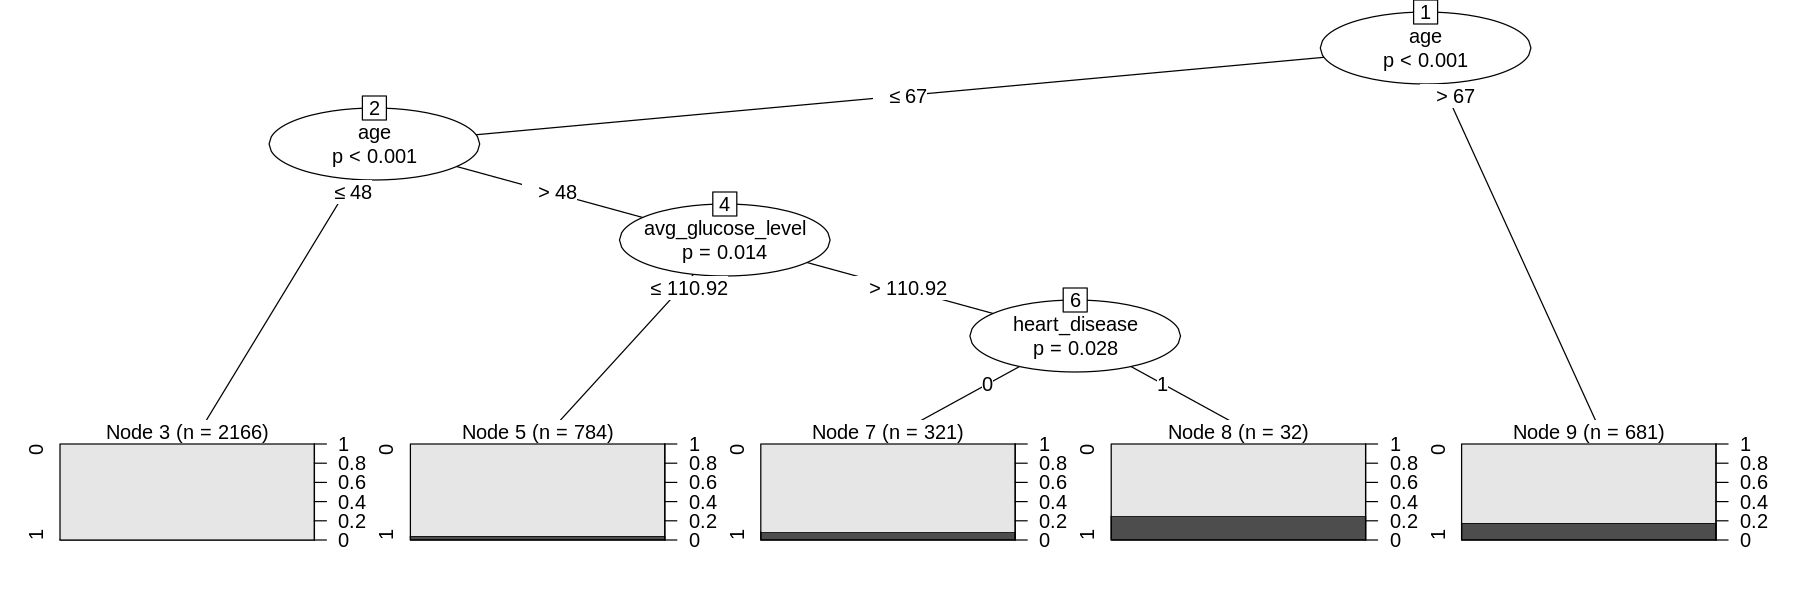

In [ ]:
# Decision tree
set.seed(1)
model_decisionTree <- ctree(stroke ~ ., train_data)
plot(model_decisionTree)

# predict test data
predict_model<-predict(model_decisionTree, test_data[-11])

confusionMatrix<-table(test_data$stroke,predict_model)
confusionMatrix

accuracy<-(confusionMatrix[1] + confusionMatrix[4])/ sum(confusionMatrix)
accuracy

# **KNN**

In [ ]:
colnames(df)

[1] "gender"            "age"               "hypertension"     
 [4] "heart_disease"     "ever_married"      "work_type"        
 [7] "Residence_type"    "avg_glucose_level" "bmi"              
[10] "smoking_status"    "stroke"

In [ ]:
numeric_data <- c(2,8,9)
# Feature Scaling
train_scale <- scale(train_data[, numeric_data])
test_scale <- scale(test_data[, numeric_data])

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 1)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))



# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 3)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 5)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 7)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 9)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 11)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 13)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

# Fitting KNN Model to training dataset
model_knn <- knn(train = train_scale,
                      test = test_scale,
                      cl = train_data$stroke,
                      k = 15)
# model_knn

# Confusiin Matrix
cm <- table(test_data$stroke, model_knn)
cm

# Model Evaluation - Choosing K
# Calculate out of Sample error
misClassError <- mean(model_knn != test_data$stroke)
print(paste('Accuracy =', 1-misClassError))

   model_knn
      0   1
  0 896  51
  1  42   8

[1] "Accuracy = 0.906720160481444"


   model_knn
      0   1
  0 937  10
  1  48   2

[1] "Accuracy = 0.941825476429288"


   model_knn
      0   1
  0 941   6
  1  50   0

[1] "Accuracy = 0.94383149448345"


   model_knn
      0   1
  0 947   0
  1  50   0

[1] "Accuracy = 0.949849548645938"


   model_knn
      0   1
  0 947   0
  1  50   0

[1] "Accuracy = 0.949849548645938"


   model_knn
      0   1
  0 947   0
  1  50   0

[1] "Accuracy = 0.949849548645938"


   model_knn
      0   1
  0 947   0
  1  50   0

[1] "Accuracy = 0.949849548645938"


   model_knn
      0   1
  0 947   0
  1  50   0

[1] "Accuracy = 0.949849548645938"
